# **Milestone 1**

##**Context**
 
 - Why is this problem important to solve?
 
- Global warming is one of the foremost problems that humanity needs to solve to ensure our survival for the future. The accumulation of greenhouse gases is one of the primary contributors and CO2 is one of the biggest contributors to this greenhouse effect. Buring of the various sources of energy that can generate the electricity is the primary source of CO2 emissions.  How to balance the reduction of carbon emission and affordable electricity production is crucial for controlling the catastrophi ceffects of global warming. Forecasting CO2 emissions can make an impact on this crucial decision-making.

##**Objective**

 - What is the intended goal?

 - The objective of this problem is to build a time series model using the AR, MA, ARMA, ARIMA and SARIMA models that can forecast the CO2 emissions value for natural gas (NNEIEUS) fuel type for the next 12 months and propose certain measures that can be adopted as policies to reduce these emissions.

##**Key questions**

- What are the key questions that need to be answered?
 

1. What are the different variables that influence C02 emissions?
2. Which factor affects the C02 emission the most? What could be plausible reasons for that?
3. What are your recommendations to key decision-maker on balancing the reduction of carbon emission and affordable electricity production?

##**Problem Formulation**:

- What is it that we are trying to solve using data science?
  - Trying to find patterns connected to large amount of data that are connected to business insights.
   - To predict the number of incoming or churning customers.
   - To explain seasonal patterns in sales.
   - To detect unusual events and estimate the magnitude of their effect.
   - To Estimate the effect of a newly launched product on the number of sold units.

##**Attributes Information:**

This datset is the past monthly data of Carbon dioxide emissions from electricity generation from the US Energy Information Administration categorized by fuel type such as Coal, Natural gas etc.

**MSN:-** Reference to Mnemonic Series Names (U.S. Energy Information Administration Nomenclature)

**YYYYMM:-** The month of the year on which these emissions were observed

**Value:-** Amount of CO2 Emissions in Million Metric Tons of Carbon Dioxide

**Description:-**  Different category of electricity production through which carbon is emissioned.

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###**Loading the libraries**

In [1]:
# Uncomment to upgrade statsmodels
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 5.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
#Import basic libraries
import pandas as pd
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###**Loading the data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [227]:
df = pd.read_excel('/content/drive/My Drive/MER_T12_06.xlsx')
df.head()

MSN  YYYYMM   Value                               Description
0  CLEIEUS  197301  72.076  Coal Electric Power Sector CO2 Emissions
1  CLEIEUS  197302  64.442  Coal Electric Power Sector CO2 Emissions
2  CLEIEUS  197303  64.084  Coal Electric Power Sector CO2 Emissions
3  CLEIEUS  197304  60.842  Coal Electric Power Sector CO2 Emissions
4  CLEIEUS  197305  61.798  Coal Electric Power Sector CO2 Emissions

In [228]:
#to ignore warnings
import warnings
import itertools
warnings.filterwarnings("ignore")

In [229]:
#conversion of "YYYYMM" columnn into standard datetime format & making it as index
# We are using errors=’coerce’. It will replace all non-numeric values with NaN.

dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_excel('/content/drive/My Drive/MER_T12_06.xlsx', parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head(15)

MSN    Value                               Description
YYYYMM                                                                
1973-01-01  CLEIEUS   72.076  Coal Electric Power Sector CO2 Emissions
1973-02-01  CLEIEUS   64.442  Coal Electric Power Sector CO2 Emissions
1973-03-01  CLEIEUS   64.084  Coal Electric Power Sector CO2 Emissions
1973-04-01  CLEIEUS   60.842  Coal Electric Power Sector CO2 Emissions
1973-05-01  CLEIEUS   61.798  Coal Electric Power Sector CO2 Emissions
1973-06-01  CLEIEUS   66.538  Coal Electric Power Sector CO2 Emissions
1973-07-01  CLEIEUS   72.626  Coal Electric Power Sector CO2 Emissions
1973-08-01  CLEIEUS   75.181  Coal Electric Power Sector CO2 Emissions
1973-09-01  CLEIEUS   68.397  Coal Electric Power Sector CO2 Emissions
1973-10-01  CLEIEUS   67.668  Coal Electric Power Sector CO2 Emissions
1973-11-01  CLEIEUS   67.021  Coal Electric Power Sector CO2 Emissions
1973-12-01  CLEIEUS   71.118  Coal Electric Power Sector CO2 Emissions
NaT         CLEIEUS  811.791  Coal Electric Power Sector CO2 Emissions
1974-01-01  CLEIEUS    70.55  Coal Electric Power Sector CO2 Emissions
1974-02-01  CLEIEUS   62.929  Coal Electric Power Sector CO2 Emissions

**The arguments can be explained as:**

- **parse_dates:** This is a key to identify the date time column. Example, the column name is ‘YYYYMM’.
- **index_col:** This is a key that forces pandas to use the date time column as index.
- **date_parser:** Converts an input string into datetime variable.

- Let us first identify and **drop the non datetimeindex** rows. First, let's convert the index to datetime, coerce errors, and filter NaT

In [230]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head()

MSN   Value                               Description
YYYYMM                                                               
1973-01-01  CLEIEUS  72.076  Coal Electric Power Sector CO2 Emissions
1973-02-01  CLEIEUS  64.442  Coal Electric Power Sector CO2 Emissions
1973-03-01  CLEIEUS  64.084  Coal Electric Power Sector CO2 Emissions
1973-04-01  CLEIEUS  60.842  Coal Electric Power Sector CO2 Emissions
1973-05-01  CLEIEUS  61.798  Coal Electric Power Sector CO2 Emissions

In [231]:
#Check the datatypes of each column. Hint: Use dtypes method
print(ts.dtypes)

MSN            object
Value          object
Description    object
dtype: object


In [232]:
#convert the emission value into numeric value
ts["Value"] = pd.to_numeric(ts["Value"], errors='coerce')

In [233]:
#Check total number of missing values of each column. Hint: Use isnull() method
ts.isna().sum()

MSN              0
Value          384
Description      0
dtype: int64

In [234]:
#Drop the missing value using dropna(inplace = True)
ts.dropna(inplace = True)

###**Dataset visualization**

- The dataset has 8 energy sources of CO2 emission. 
- Group the CO2 Emission dataset based on the type of energy source.

In [236]:
ts_per_source = ts.groupby('Description')
ts_per_source.head(5)

MSN    Value                                        Description
YYYYMM                                                                         
1973-01-01  CLEIEUS   72.076           Coal Electric Power Sector CO2 Emissions
1973-02-01  CLEIEUS   64.442           Coal Electric Power Sector CO2 Emissions
1973-03-01  CLEIEUS   64.084           Coal Electric Power Sector CO2 Emissions
1973-04-01  CLEIEUS   60.842           Coal Electric Power Sector CO2 Emissions
1973-05-01  CLEIEUS   61.798           Coal Electric Power Sector CO2 Emissions
1973-01-01  NNEIEUS   12.175    Natural Gas Electric Power Sector CO2 Emissions
1973-02-01  NNEIEUS   11.708    Natural Gas Electric Power Sector CO2 Emissions
1973-03-01  NNEIEUS   13.994    Natural Gas Electric Power Sector CO2 Emissions
1973-04-01  NNEIEUS   14.627    Natural Gas Electric Power Sector CO2 Emissions
1973-05-01  NNEIEUS   17.344    Natural Gas Electric Power Sector CO2 Emissions
1973-01-01  DKEIEUS    2.375  Distillate Fuel, Including Kerosene-Type Jet F...
1973-02-01  DKEIEUS    2.061  Distillate Fuel, Including Kerosene-Type Jet F...
1973-03-01  DKEIEUS    1.171  Distillate Fuel, Including Kerosene-Type Jet F...
1973-04-01  DKEIEUS    1.022  Distillate Fuel, Including Kerosene-Type Jet F...
1973-05-01  DKEIEUS    0.949  Distillate Fuel, Including Kerosene-Type Jet F...
1973-01-01  PCEIEUS    0.128  Petroleum Coke Electric Power Sector CO2 Emiss...
1973-02-01  PCEIEUS    0.106  Petroleum Coke Electric Power Sector CO2 Emiss...
1973-03-01  PCEIEUS    0.083  Petroleum Coke Electric Power Sector CO2 Emiss...
1973-04-01  PCEIEUS    0.130  Petroleum Coke Electric Power Sector CO2 Emiss...
1973-05-01  PCEIEUS    0.167  Petroleum Coke Electric Power Sector CO2 Emiss...
1973-01-01  RFEIEUS   24.867  Residual Fuel Oil Electric Power Sector CO2 Em...
1973-02-01  RFEIEUS   20.867  Residual Fuel Oil Electric Power Sector CO2 Em...
1973-03-01  RFEIEUS   19.780  Residual Fuel Oil Electric Power Sector CO2 Em...
1973-04-01  RFEIEUS   16.562  Residual Fuel Oil Electric Power Sector CO2 Em...
1973-05-01  RFEIEUS   17.754  Residual Fuel Oil Electric Power Sector CO2 Em...
1973-01-01  PAEIEUS   27.369      Petroleum Electric Power Sector CO2 Emissions
1973-02-01  PAEIEUS   23.034      Petroleum Electric Power Sector CO2 Emissions
1973-03-01  PAEIEUS   21.034      Petroleum Electric Power Sector CO2 Emissions
1973-04-01  PAEIEUS   17.714      Petroleum Electric Power Sector CO2 Emissions
1973-05-01  PAEIEUS   18.870      Petroleum Electric Power Sector CO2 Emissions
1989-01-01  GEEIEUS    0.031  Geothermal Energy Electric Power Sector CO2 Em...
1989-02-01  GEEIEUS    0.028  Geothermal Energy Electric Power Sector CO2 Em...
1989-03-01  GEEIEUS    0.031  Geothermal Energy Electric Power Sector CO2 Em...
1989-04-01  GEEIEUS    0.030  Geothermal Energy Electric Power Sector CO2 Em...
1989-05-01  GEEIEUS    0.031  Geothermal Energy Electric Power Sector CO2 Em...
1989-01-01  NWEIEUS    0.371  Non-Biomass Waste Electric Power Sector CO2 Em...
1989-02-01  NWEIEUS    0.335  Non-Biomass Waste Electric Power Sector CO2 Em...
1989-03-01  NWEIEUS    0.371  Non-Biomass Waste Electric Power Sector CO2 Em...
1989-04-01  NWEIEUS    0.359  Non-Biomass Waste Electric Power Sector CO2 Em...
1989-05-01  NWEIEUS    0.371  Non-Biomass Waste Electric Power Sector CO2 Em...
1973-01-01  TXEIEUS  111.621   Total Energy Electric Power Sector CO2 Emissions
1973-02-01  TXEIEUS   99.185   Total Energy Electric Power Sector CO2 Emissions
1973-03-01  TXEIEUS   99.112   Total Energy Electric Power Sector CO2 Emissions
1973-04-01  TXEIEUS   93.183   Total Energy Electric Power Sector CO2 Emissions
1973-05-01  TXEIEUS   98.012   Total Energy Electric Power Sector CO2 Emissions

####**Visualize the dependency of the emission in the power generation with time.**

In [237]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

In [238]:
cols_code=ts.Description.unique()
cols_code

array(['Coal Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'], dtype=object)

In [239]:
cols_re_ordered = ['Coal', 'Natural Gas', 'Distillate Fuel', 'Petroleum Coke', 'Residual Fuel Oil', 'Petroleum', 'Geothermal Energy', 'Non-Biomass Waste', 
                   'Total Emissions']

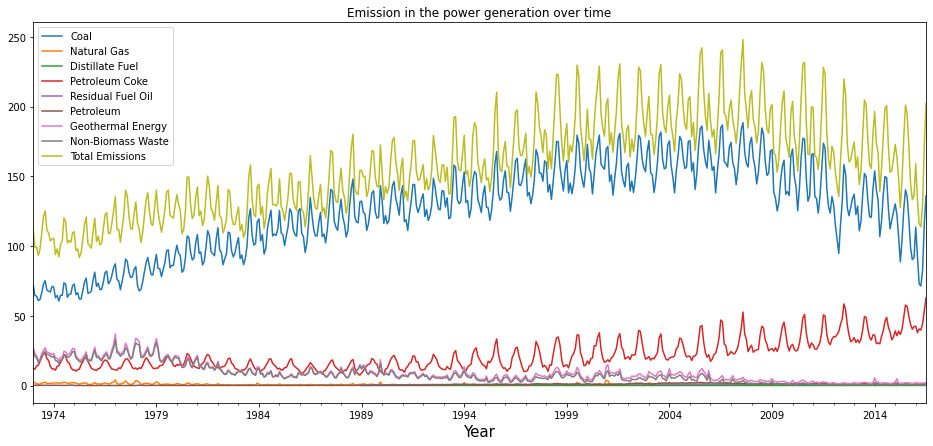

In [240]:
fix, ax = plt.subplots(figsize=(16,7))
for label, df in ts.groupby('Description'):
    df.Value.plot()
plt.legend(cols_re_ordered)
plt.title('Emission in the power generation over time')
plt.xlabel('Year', fontsize=15)
plt.show()


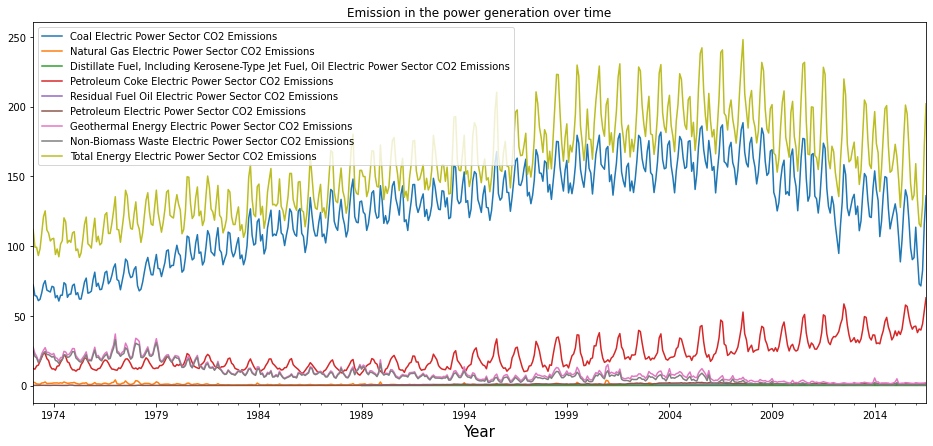

In [241]:
fix, ax = plt.subplots(figsize=(16,7))
cols_code=ts.Description.unique()
for label, df in ts.groupby('Description'):
    df.Value.plot()
plt.legend(cols_code)
plt.title('Emission in the power generation over time')
plt.xlabel('Year', fontsize=15)
plt.show()

- **Observations and Insights: _____**
-	Total Emissions hit peak around year 2009. 
-	Overall, the amount of CO2 emissions from source of Coal Electric Power is very high and dominant compared to the other 7 sources. Clearly it's the primary source of carbon emission. But the the amount of CO2 emissions from Coal Electric Power has been going down after year 2009.
-	The amount of CO2 emissions from Petroleum Coke Electric Power and the other 6 sources were at the very close level before the year 2000. Starting from year 2000, for some reason the amount of CO2 emissions from Petroleum Coke has been increased. The amount of CO2 emissions from the other 6 sources has been going down and especailly after year 2017 have decreased significantly.
-	The above plot also shows the amount of CO2 emissions from the two sources of Coal Electric Power and Petroleum Coke are at very close level since year 2016. It suggests the Coal Electric Power and Petroleum Coke are the two primary source of carbon emissions since 2016 till now.
-	For each trend line has obvious peaks and minimums for cetern time periods, it suggests it has Seasonality trend that repeats with respect to timing. It means there are some underlying parterns under the trends for each type of energy source can be explorated.



#### **Visualize the trend of CO2 emission from each energy source individually**

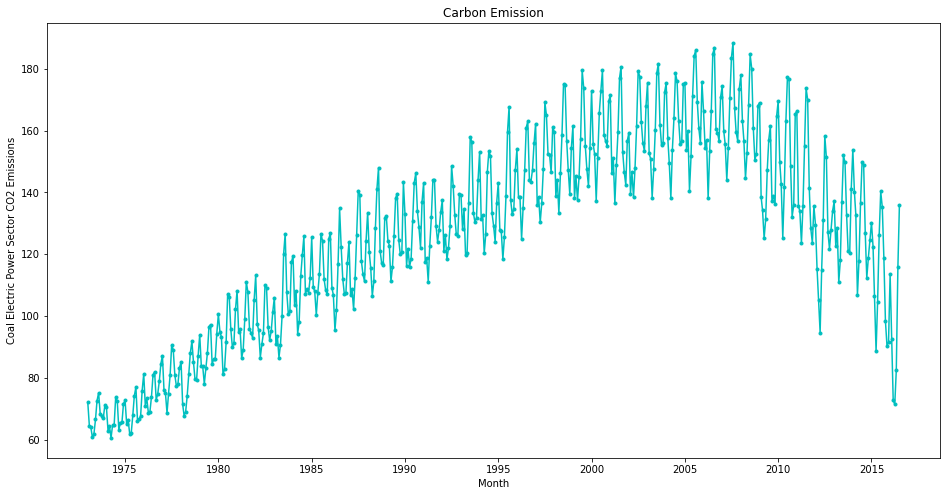

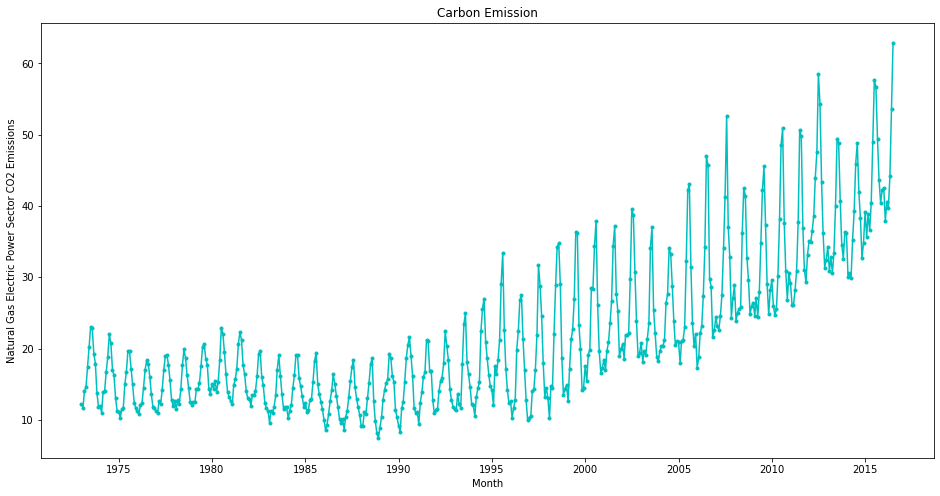

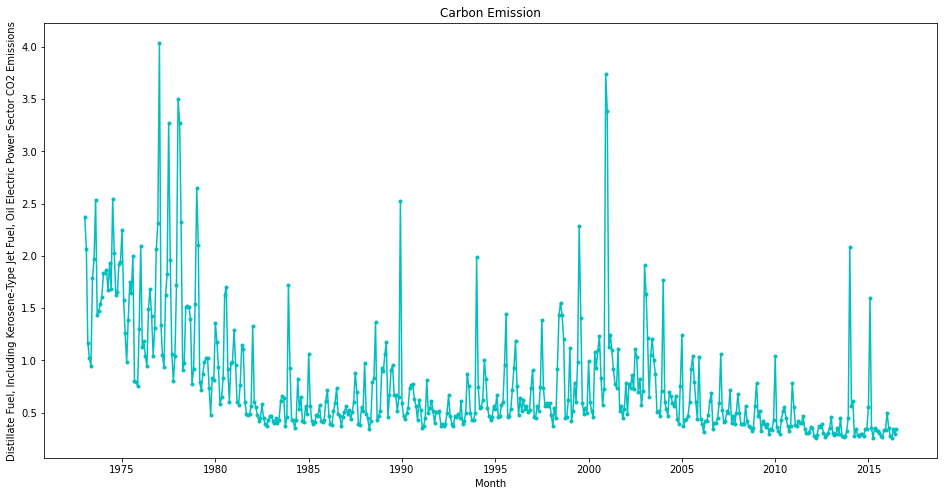

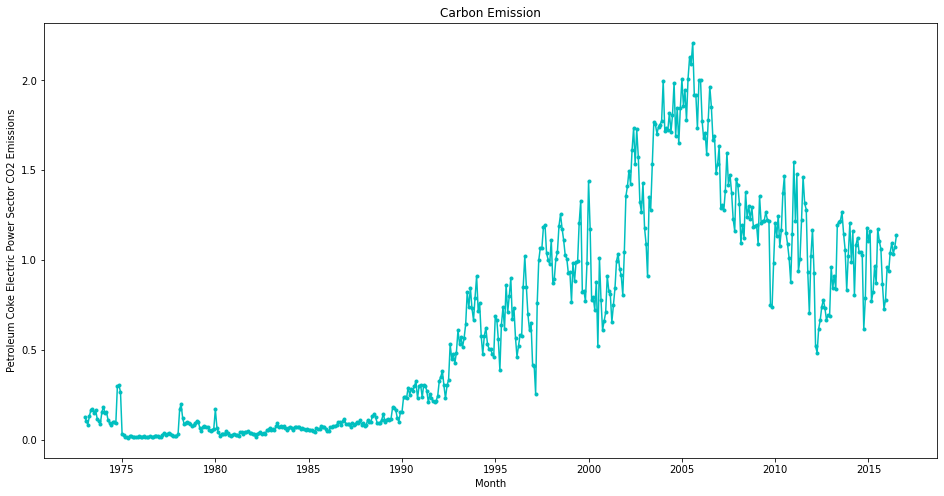

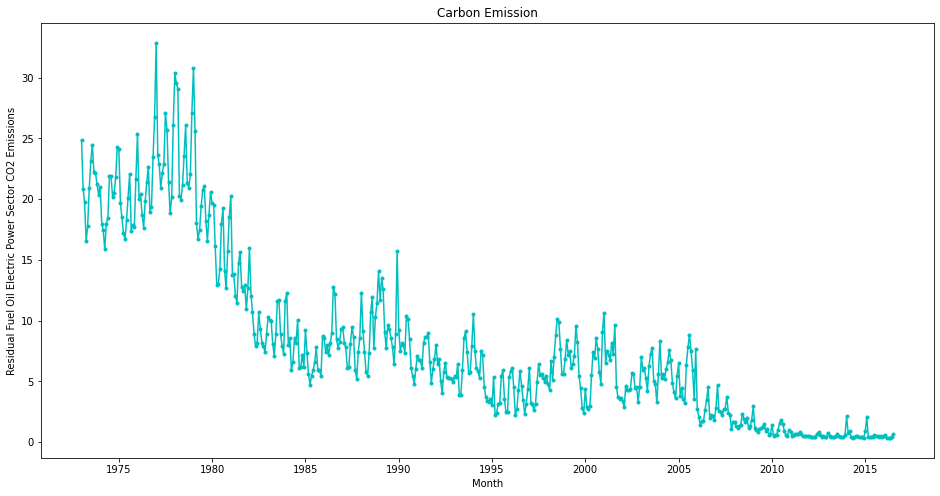

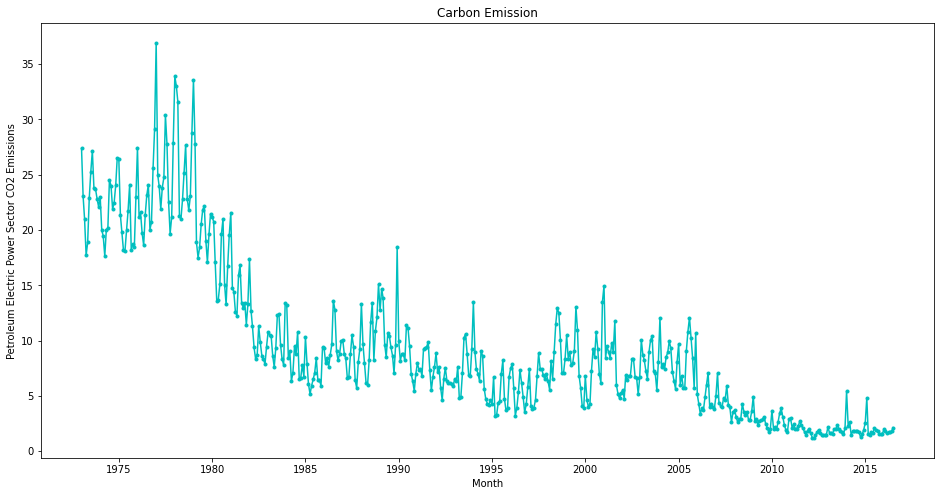

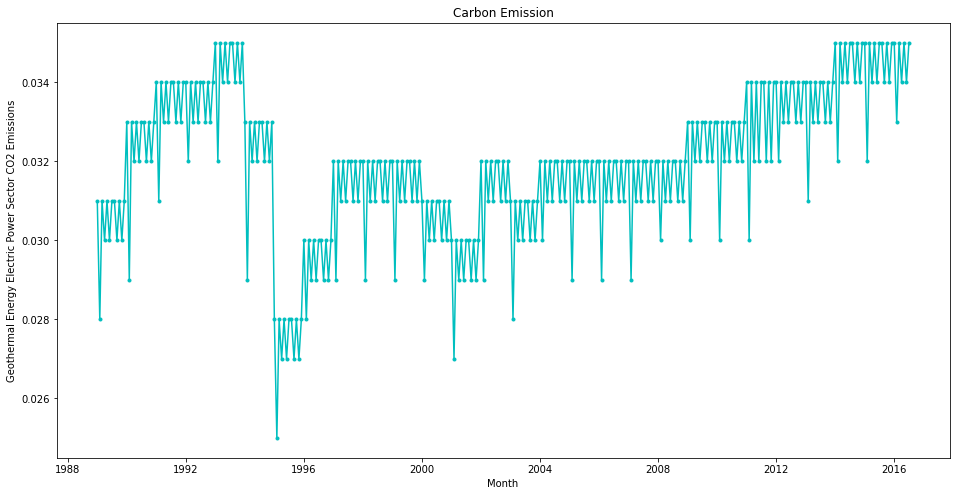

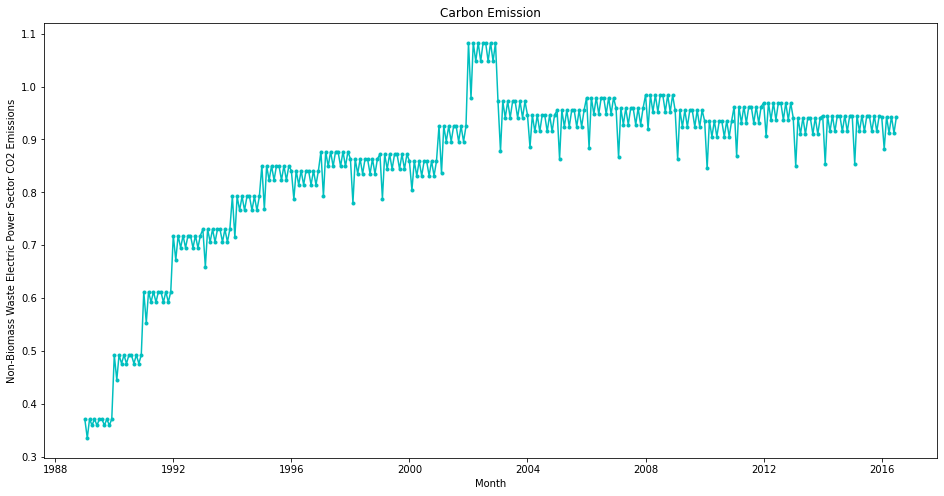

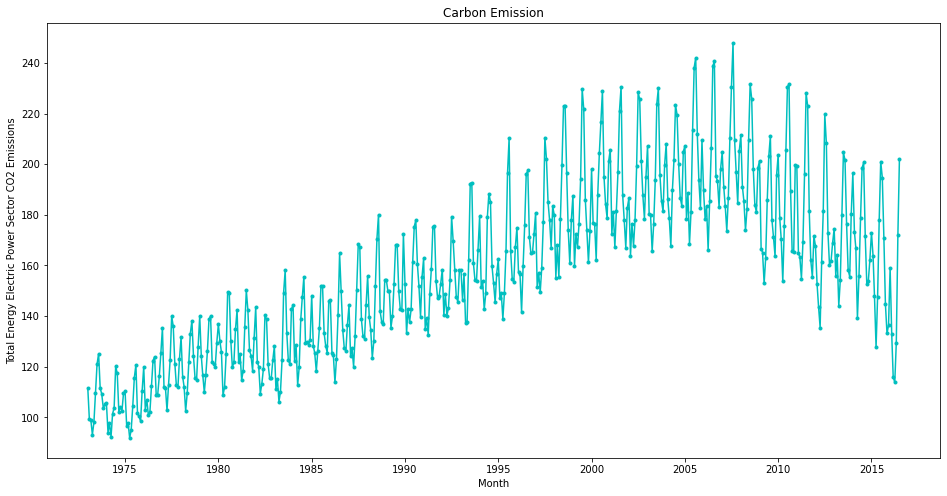

In [242]:
###Code here
ts_grouped = ts.groupby('Description')
cols_code=ts.Description.unique()
cols_code
for col in cols_code:
    plt.figure(figsize=(16,8))
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.title('Carbon Emission')
    plt.plot(ts_grouped.get_group(col).index,ts_grouped.get_group(col).Value,color = 'c', marker='.')
    plt.show()

#### **Observations and Insights: ______**
-	From the visualization, it is clearly that the time series has a deterministic trend in CO2 emissions amount from the sources of Coal Electric Power, Natural Gas Electric, Petroleum Coke Electric, Residual Fuel Oil, Petroleum Electric Power, Non-Biomass Waste Electric Power, Total Emissions.
-	The CO2 emissions amount from the sources of Geothermal Energy Electric and Distillate Fuel hasn’t shown very clear trend over the much to do with time But it shows the seasonality trend that repeats with respect to timing.
-	We can see that the series has an upward trend with some seasonality in the data sources of Coal Electric Power, Natural Gas Electric, Petroleum Coke Electric, Non-Biomass Waste Electric Power and Total Emissions. 
-	The value of emissions from the source of Petroleum Coke has increased tremendously after the year 1990, hit the peak around year 2006 and still has kept at very high level even it has been decreasing. We may need the log transform to make the time-series from Petroleum Coke stationary.
-	The CO2 emissions amount from the sources of Non-Biomass Waste Electric Power had been going up before the year 1996 and has been keeping at constant value since 1996.
-	Oppositely, we can see the series has a downward trend with some seasonality in the data sources of Residual Fuel Oil and Petroleum Electric Power. The value of emissions from Residual Fuel Oil has decreased tremendously around the year 1980.  The value of emissions from Petroleum Electric Power has decreased tremendously around the year 1980.  It suggests there may be some similar factors influenced that caused the value of emissions decreased tremendously from Residual Fuel Oil and Petroleum Electric Power.


####**Bar chart of CO2 Emissions per energy source**

In [243]:
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values().to_frame()
CO2_per_source.head(9)

Value
Description                                                  
Geothermal Energy Electric Power Sector CO2 Emi...     10.563
Non-Biomass Waste Electric Power Sector CO2 Emi...    281.367
Petroleum Coke Electric Power Sector CO2 Emissions    338.785
Distillate Fuel, Including Kerosene-Type Jet Fu...    404.887
Residual Fuel Oil Electric Power Sector CO2 Emi...   4239.312
Petroleum Electric Power Sector CO2 Emissions        4982.993
Natural Gas Electric Power Sector CO2 Emissions     11295.359
Coal Electric Power Sector CO2 Emissions            65782.393
Total Energy Electric Power Sector CO2 Emissions    82352.676

In [244]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']
cols_1 = ['Coal', 'Distillate Fuel', 'Geothermal Energy', 'Natural Gas', 'Non-Biomass Waste', 'Petroleum Coke', 'Petroleum', 'Residual Fuel Oil', 'Total Emissions']
CO2_per_source["Energy_Type"] = cols_1
CO2_per_source.head()

Value        Energy_Type
Description                                                                    
Geothermal Energy Electric Power Sector CO2 Emi...    10.563               Coal
Non-Biomass Waste Electric Power Sector CO2 Emi...   281.367    Distillate Fuel
Petroleum Coke Electric Power Sector CO2 Emissions   338.785  Geothermal Energy
Distillate Fuel, Including Kerosene-Type Jet Fu...   404.887        Natural Gas
Residual Fuel Oil Electric Power Sector CO2 Emi...  4239.312  Non-Biomass Waste

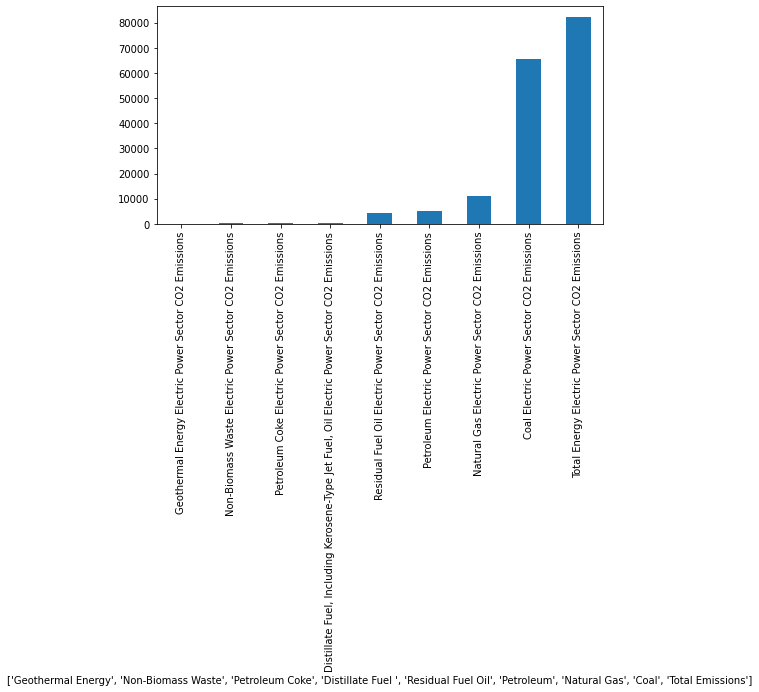

In [245]:
##Code here
CO2_per_source.Value.plot(kind='bar', figsize=(8,4))
plt.xlabel(cols)
plt.show()

####**For developing the time series model and forcasting, use the natural gas CO2 emission from the electirical power generation**


In [246]:
Emissions = ts.iloc[:,1:] # Monthly total emissions (mte)
Emissions = Emissions.groupby(['Description', pd.Grouper(freq="M")])['Value'].sum().unstack(level = 0)
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)Emissions.head()
mte.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

####**Observations & insights: _____**
-	From the above the caculation of monthly total emissions, it is clearly that the time series has a deterministic trend in the overal CO2 emissions generated from the electirical power.
-	The overall trend between the emissions value and time is going up even if for some month it may go down.
-	There should be clear pattern between variables and time. We will need to build different models to find the underlying pattern in order to predict the trende in next 12 month.



##**Proposed approach**

- **Potential techniques -** What different techniques should be explored?
- Calculating the rolling mean, Augmented Dickey-Fuller (ADF) Test, Log Transformation, By differencing the series (lagged series)
- AR, MA, ARMA, and ARIMA models.





- **Overall solution design -** What is the potential solution design?
  1.	Splitting the dataset to train data and test data
  2.	The first task is to make the time-series stationary.
  3.	Decompose the time series components into Trend, Seasonality and Residual.
  4.	Then plot the auto-correlation function and partial auto-correlation function.
  5.	Estimate the order of p and q. 
  6.	Get p and q values for AR, MA, ARMA, and ARIMA models.
  7.	Select the best model with the least RMSE or lowest AIC.
  8.	Use the inverse transformation to get back the original values.
  9.	Forecast the values for the next 12 months and comparing it with the test data.






- **Measures of success -** What are the key measures of success?
- RMSE, BIC, AIC

#**Milestone 2**


### **Natural gas based CO2 emission forecasting**


For developing the time series model and forecasting, you are expected to use the natural gas CO2 emission from the electrical power generation. We need to slice this data:

In [247]:
#Importing library for date manipulation
from datetime import datetime

#To calculate the MSE or RMSE
from sklearn.metrics import mean_squared_error

#Importing acf and pacf functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Importing models from statsmodels library
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [248]:
###Slice the data to get the monthly total CO2 emissions of Natural Gas Electric Power Sector
Emissions = ts.iloc[:,1:] # Monthly total emissions (mte)
Emissions = Emissions.groupby(['Description', pd.Grouper(freq="M")])['Value'].sum().unstack(level = 0)
ts_mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)Emissions.head()


In [249]:
 #Check 1st few rows of data
ts_mte= Emissions[['Natural Gas Electric Power Sector CO2 Emissions']].rename(columns={'Natural Gas Electric Power Sector CO2 Emissions':'Value'})
ts_mte.head()


Description   Value
YYYYMM             
1973-01-31   12.175
1973-02-28   11.708
1973-03-31   13.994
1973-04-30   14.627
1973-05-31   17.344

###**Split the dataset**

In [250]:
# Split the data into train and test
ts_train, ts_test = ts_mte.iloc[:-12], ts_mte.iloc[-12:]
print(ts_train)
print(ts_test)

Description   Value
YYYYMM             
1973-01-31   12.175
1973-02-28   11.708
1973-03-31   13.994
1973-04-30   14.627
1973-05-31   17.344
...             ...
2015-03-31   38.872
2015-04-30   36.610
2015-05-31   40.440
2015-06-30   48.920
2015-07-31   57.712

[511 rows x 1 columns]
Description   Value
YYYYMM             
2015-08-31   56.662
2015-09-30   49.384
2015-10-31   43.680
2015-11-30   40.394
2015-12-31   42.270
2016-01-31   42.566
2016-02-29   37.918
2016-03-31   40.525
2016-04-30   39.763
2016-05-31   44.210
2016-06-30   53.567
2016-07-31   62.881


###**Test the Stationarity**

In [251]:
#Import the required package

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

###**Test the stationarity through Visualization**

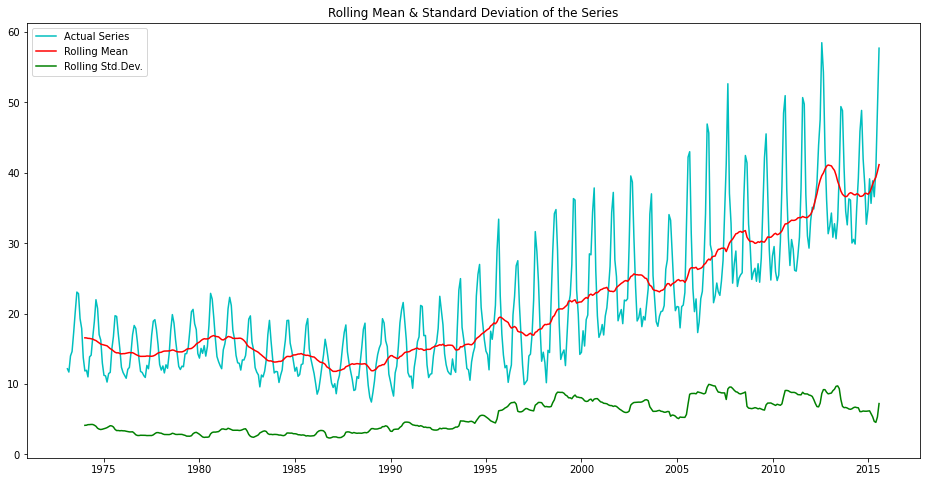

In [252]:
# Calculate the rolling mean and standard deviation for a window of 12 observations
rolmean=ts_train.rolling(window=12).mean()
rolstd=ts_train.rolling(window=12).std()

# Visualize the rolling mean and standard deviation
plt.figure(figsize=(16, 8))
actual = plt.plot(ts_train, color='c', label='Actual Series')
rollingmean = plt.plot(rolmean, color='red', label='Rolling Mean')
rollingstd = plt.plot(rolstd, color='green', label='Rolling Std.Dev.')
plt.title('Rolling Mean & Standard Deviation of the Series')
plt.legend()
plt.show()


#### **Observations and Insights: ____**
 - The above plot shows there is an upward trend in the Rolling Mean series, so we can confirm that the series is not stationary.
 - Standard deviation is almost constant which implies that the series has constant variance.

### **Test the stationarity using the Augmented Dickey-Fuller Test**

Use the **Augmented Dickey-Fuller (ADF) Test** to verify if the series is stationary or not. The null and alternate hypotheses for the ADF Test are defined as:

**- Null hypothesis:** The Time Series is non-stationary


**- Alternative hypothesis:** The Time Series is stationary

In [262]:
#Define a function to use adfuller test
def adfuller(dataset):
  #Code here
  from statsmodels.tsa.stattools import adfuller
  print('Dickey-Fuller Test: ')
  adftest = adfuller(dataset['Value'])
  adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
  for key,value in adftest[4].items():
    adfoutput
    adfoutput['Critical Value (%s)'%key] = value
  print(adfoutput)
adfuller(ts_train)

Dickey-Fuller Test: 
Test Statistic            1.459996
p-value                   0.997370
Lags Used                19.000000
No. of Observations     491.000000
Critical Value (1%)      -3.443739
Critical Value (5%)      -2.867444
Critical Value (10%)     -2.569915
dtype: float64


**Observations and Insights**
   - From the above test, the **p-value = 0.997 i.e. > 0.05** (for the 95% confidence intervals) therefor we fail to reject the null hypothesis.
   - It can confirm that the series is non-stationary.

###**Transformation of the dataset into a stationary one**

**We can use some of the following methods to convert a non-stationary series into a stationary one:**


1. Log Transformation
2. Differencing the series (lagged series)

We take the average of ‘k’ consecutive values depending on the frequency of time series (in this capstone 12 months). 

Here, we will take the average over the past 1 year.

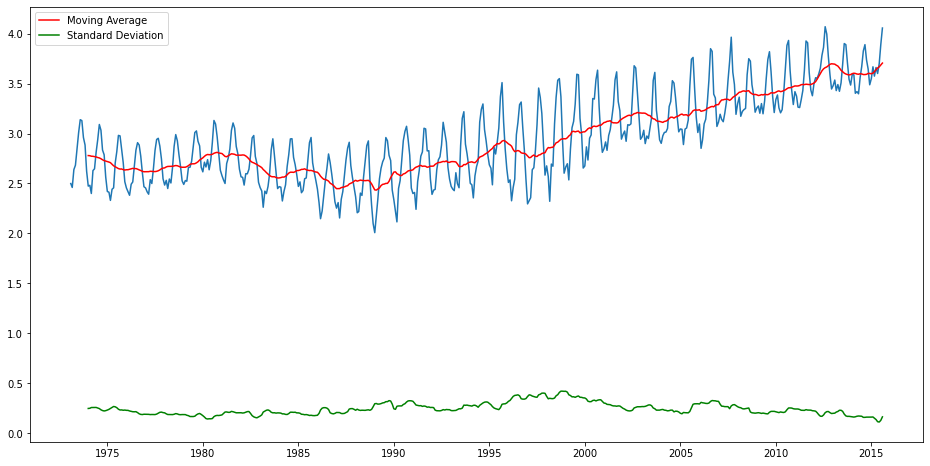

In [263]:
 # Visualize the rolling mean and standard deviation after using log transformation
plt.figure(figsize=(16,8))
ts_log = np.log(ts_train)
MAvg = ts_log.rolling(window=12).mean()
MStd = ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(MAvg, color='r', label = 'Moving Average')
plt.plot(MStd, color='g', label = 'Standard Deviation')
plt.legend()
plt.show() 

**Observations and Insights: _____**
- The above plot still shows the upward trend in the series, so we can conclude that the series is still non-stationary.
- The standard deviation is more near to be constant compared to the previous series. which implies that now the series has more constant variance compared to the previous series.

**Visualize the rolling mean and rolling standard deviation of the shifted series (df_shift) and check the stationarity by calling the adfuller() function. Also, write your observations on the same.**

###**Think about it:**
- Do you need to remove the null values that we get after applying differencing method?
    - Yes. We need to drop the null values that we get after applying differencing method


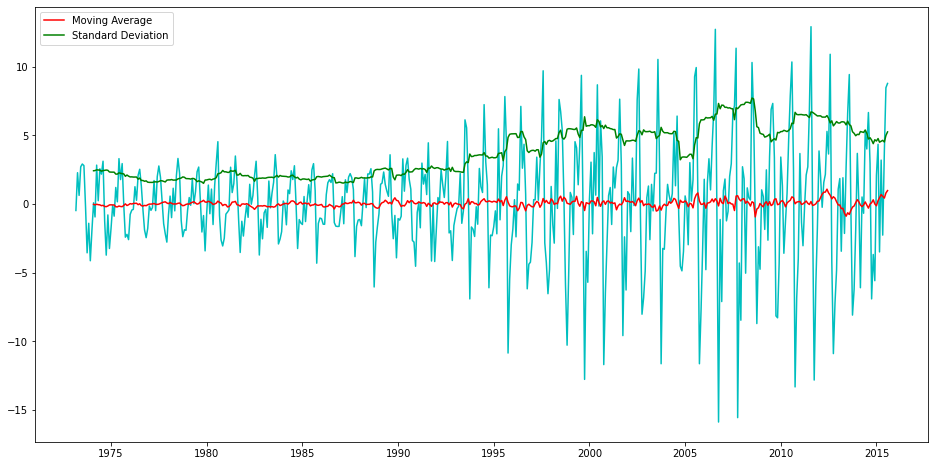

In [266]:
##Code here
plt.figure(figsize=(16,8))
df_shift = ts_train - ts_train.shift(periods=1)
MAvg_shift = df_shift.rolling(window=12).mean()
MStd_shift = df_shift.rolling(window=12).std()
plt.plot(df_shift, color='c')
plt.plot(MAvg_shift, color='red', label = 'Moving Average')
plt.plot(MStd_shift, color='green', label = 'Standard Deviation')
plt.legend()
plt.show()

df_shift = df_shift.dropna()

**Observations and Insights: _____**
 - The mean and the standard deviation seem to be constant over time. It implies that the series is stationary now.
 - We can use the adfuller test to check the stationarity.

In [267]:
adfuller(df_shift)

Dickey-Fuller Test: 
Test Statistic           -5.343670
p-value                   0.000004
Lags Used                18.000000
No. of Observations     491.000000
Critical Value (1%)      -3.443739
Critical Value (5%)      -2.867444
Critical Value (10%)     -2.569915
dtype: float64


**Observations and Insights: _____**
  - We can see the **p-value is 0.000004 which is far lesser than 0.05** (for the 95% confidence interval), therefore we can **reject the null hypothesis that the series is non-stationary**.
  - We can conclude that **the series is now stationary**. In next, we can decompose the time series to check its different components.

### **Elimination of trend and seasonality: Decomposition**

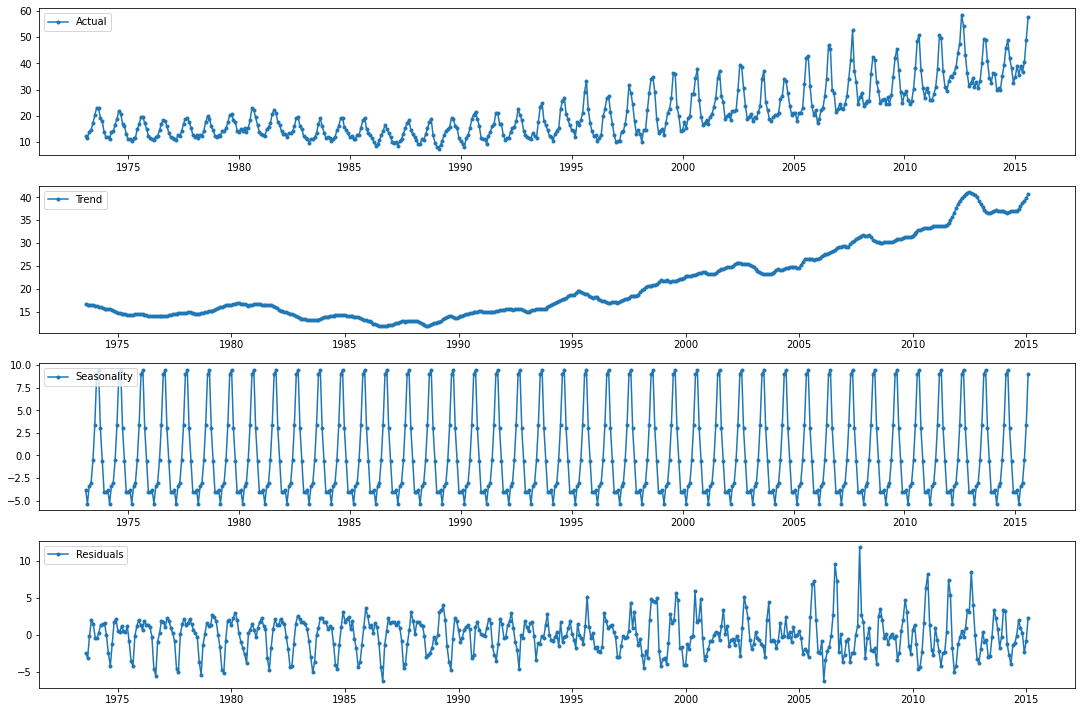

In [291]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts_train)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(ts_train, label='Actual', marker='.')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', marker='.')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', marker='.')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', marker='.')
plt.legend(loc='upper left')
plt.tight_layout()

###**Observations**:
- The plot for seasonality shows that the Emissions Value spikes in July and August (1st Tier Cohort) and then has a second-tier cohort of emissions in June and September, and a third-tier cohort of emissions for May and October, and a fourth-tier cohort of emissions for the other months in the year. 
- One would guess that July/August 1st Tier Cohort spike is driven by very hot weather and air conditioning needs for both consumers and enterprise companies. 
- 2nd tier cohort emissions are about 1/3 the volume of the 1st tier cohort emissions, and 3rd tier cohort emissions again are about 1/3 the volume of the 2nd tier cohort emissions.
- 3rd and 4th tier cohorts are zero or less CO2 emissions and represent 8 months of the year or 75% of the year.


**Plot the auto-correlation function and partial auto-correlation function to get p and q values for AR, MA, ARMA, and ARIMA models**

### **Find optimal parameters (P, Q) and build the AR, MA, ARMA & ARIMA models**

**Plot the ACF and PACF charts and find the optimal parameters**

<Figure size 1152x576 with 0 Axes>

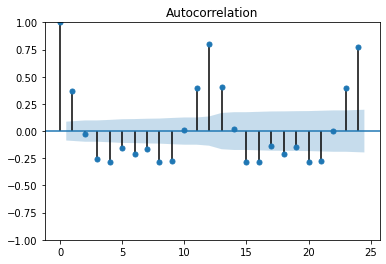

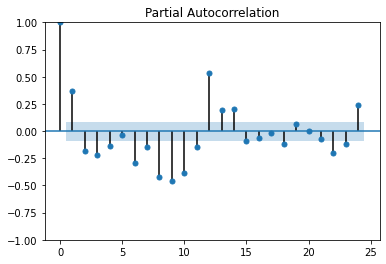

In [269]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize = (16,8))
plot_acf(df_shift, lags = 24) 
plt.show() 
plot_pacf(df_shift, lags = 24) 
plt.show()

**Observations and Insights: _____**
- From the above PACF plot we can identify that **the highest lag** at which the plot extends beyond the statistically significant boundary is **lag 1**. After the lag 1 most lags are not significant.
- This indicates that an **AR(p) Model of lag 1 (p=1)** should be sufficient to fit the data.
- From the ACF plot, we can identify that **q** for the **moving average model MA(q)** would be 1.

###**AR Model**

Order p is the lag value after which the PACF plot crosses the upper confidence interval for the first time. These p lags will act as our features while forecasting the AR time series.

Fit and predict the shifted series with the AR Model and calculate the RMSE. Also, visualize the time series and write your observations.

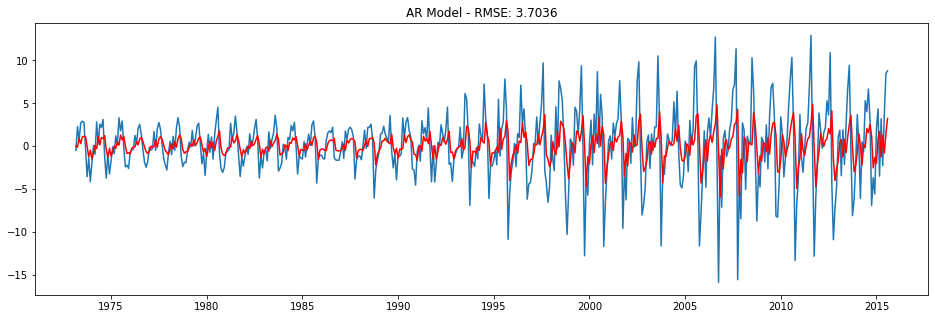

In [270]:
#Importing AutoReg function to apply AR model
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

#Code here
plt.figure(figsize=(16,5))
model_AR = AutoReg(df_shift, lags=1) #Using number of lags as 1
results_AR = model_AR.fit()
plt.plot(df_shift)

predict = results_AR.predict(start=0,end=len(df_shift)-1)
predict = predict.fillna(0) #Converting NaN values to 0
plt.plot(predict, color='red')
plt.title('AR Model - RMSE: %.4f'% mean_squared_error(predict, df_shift['Value'], squared=False))
plt.show()

**Observations & Insights: _____**
- We can get root mean squared error (RMSE) = 3.6399 by using the AR model.

In [271]:
#check the AIC value of the AR model
results_AR.aic

2784.32302970319

###**MA Model**

####**Think about it:**

- Do we really have to find AR & I value other than 0 to forecast on the MA based model?

Order q of the MA process is obtained from the ACF plot, this is the lag after which ACF crosses the upper confidence interval for the first time.

Fit and predict the shifted series with the MA Model and calculate the RMSE. Also, visualize the time series and write your observations.

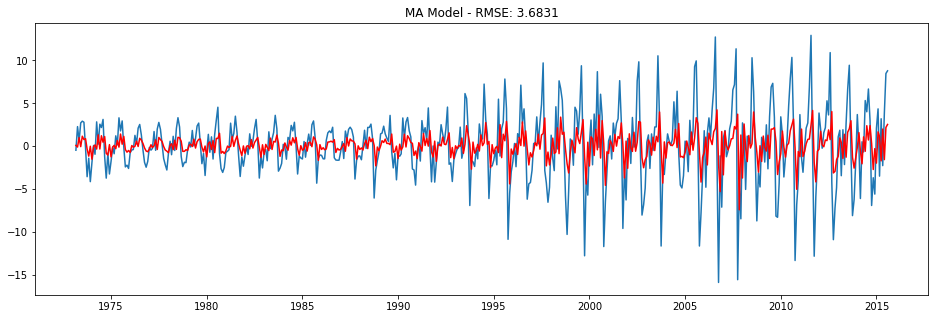

In [272]:
#Code here
plt.figure(figsize=(16,5))
model_MA = ARIMA(df_shift, order=(0, 0, 1)) #Using p=0, d=0, q=1
results_MA = model_MA.fit()
plt.plot(df_shift)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('MA Model - RMSE: %.4f'% mean_squared_error(results_MA.fittedvalues, df_shift['Value'], squared=False))
plt.show()

**Observations & Insights: _____**
- We can get root mean squared error (RMSE) = 3.6804 by using the MA model.

In [39]:
#check the AIC value of the MA Model
results_MA.aic

2783.29635645021

###**ARMA MODEL**

**We will be using the above AR lag(P) & MA lag(Q) as a paramter** and d=0 in ARIMA so that it will work as an ARMA model.

Fit and predict the shifted series with the ARMA Model and calculate the RMSE. Also, visualize the time series and write your observations.

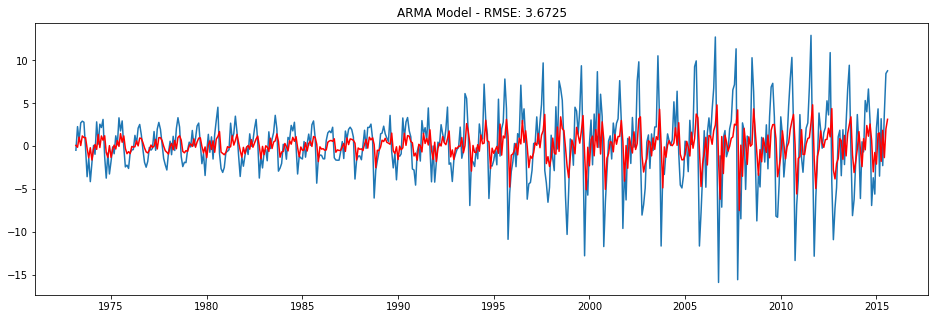

In [273]:
# code here
plt.figure(figsize=(16,5))
model_ARMA = ARIMA(df_shift, order=(1, 0, 1)) #Using p=1, d=0, q=1
results_ARMA = model_ARMA.fit()
plt.plot(df_shift)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('ARMA Model - RMSE: %.4f'% mean_squared_error(results_ARMA.fittedvalues, df_shift['Value'], squared=False))
plt.show()

**Observations & Insights: _____**
- We can get root mean squared error (RMSE) = 2.9481 by using the ARMA model with d=0.

**Check the AIC value of the model**

In [274]:
#code here
results_ARMA.aic

2782.3723980767704

###**ARIMA MODEL**


**Fit and predict the shifted series with the ARIMA Model and calculate the RMSE. Also, visualize the time series and write your observations.**

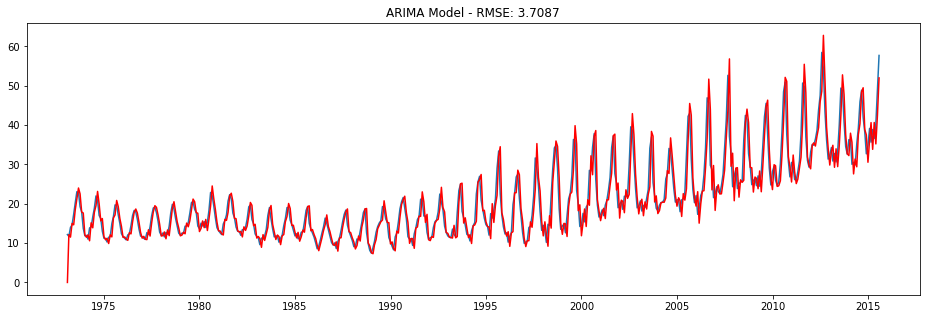

In [275]:
# code here
plt.figure(figsize=(16,5))
model_ARIMA = ARIMA(ts_train, order=(1,1,1)) #Using p=1, d=1, q=1
results_ARIMA = model_ARIMA.fit()
plt.plot(ts_train)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('ARIMA Model - RMSE: %.4f'% mean_squared_error(results_ARIMA.fittedvalues, ts_train['Value'], squared=False))
plt.show()

**Observations & Insights**:____
- We can get root mean squared error (RMSE) = 2.9985 by using the ARIMA model with d=1.

**Check the AIC value of the model**

In [276]:
results_ARIMA.aic

2780.5230055538705

In [44]:
# Printing the fitted values from arima
predictions=pd.Series(results_ARIMA.fittedvalues)
predictions.head()

YYYYMM
1973-01-31     0.000000
1973-02-28    12.175077
1973-03-31    11.525556
1973-04-30    15.079294
1973-05-31    14.861280
Freq: M, dtype: float64

###**Inverse Transformation**

**Use the correct inverse transformation depending on the model chosen to get back the original values.**

**Apply an inverse transformation on the predictions of the chosen model**

In [277]:
#Add the code blocks based on the requirements
#Apply the ARIMA

#predictions = predictions.cumsum()
#predictions_log = pd.Series(ts_log['Value'].iloc[0], index=ts_log.index)
#predictions_log = predictions_log.add(predictions, fill_value=0)
#predictions_ARIMA = np.exp(predictions_log)
predictions_ARIMA = predictions.copy()
predictions_ARIMA.head()

YYYYMM
1973-01-31     0.000000
1973-02-28    12.175077
1973-03-31    11.525556
1973-04-30    15.079294
1973-05-31    14.861280
Freq: M, dtype: float64

In [278]:
predictions_ARIMA.dtype

dtype('float64')

In [279]:
#Apply the ARMA model
#predictions=pd.Series(results_ARMA.fittedvalues)
#predictions_cumsum = predictions.cumsum()
#predictions_log = pd.Series(ts_log['Value'].iloc[0], index=ts_log.index)
#predictions_log = predictions_log.add(predictions_cumsum, fill_value=0)
#predictions_ARMA = np.exp(predictions_log)
#predictions_ARMA.head()

In [48]:
#plt.figure(figsize=(16,5))
#plt.plot(ts_train, color = 'c', label = 'Original Series')
#plt.plot(predictions_ARMA, color = 'r', label = 'Predicted Series')
#plt.title('Actual vs Predicted')
#plt.legend()
#plt.show()

**Plot the original vs predicted series**

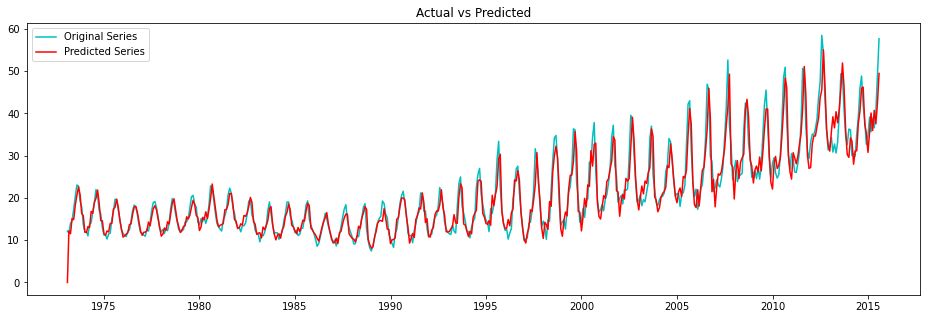

In [49]:
#Code here
plt.figure(figsize=(16,5))
plt.plot(ts_train, color = 'c', label = 'Original Series')
plt.plot(predictions_ARIMA, color = 'r', label = 'Predicted Series')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

**Observations & Insights: _____**
- As observed, most of the predicted values on the training data are close to the actual values except for the spikes in the emission values in the july timeframe of the year.

###**Forecast the values for next 24 months and compare it with test data**

In [280]:
#Add the code blocks based on the requirements
forecasted_ARIMA = results_ARIMA.forecast(steps=24) 
forecasted_ARIMA


2015-08-31    60.644223
2015-09-30    61.153014
2015-10-31    61.241298
2015-11-30    61.256616
2015-12-31    61.259275
2016-01-31    61.259736
2016-02-29    61.259816
2016-03-31    61.259830
2016-04-30    61.259832
2016-05-31    61.259832
2016-06-30    61.259833
2016-07-31    61.259833
2016-08-31    61.259833
2016-09-30    61.259833
2016-10-31    61.259833
2016-11-30    61.259833
2016-12-31    61.259833
2017-01-31    61.259833
2017-02-28    61.259833
2017-03-31    61.259833
2017-04-30    61.259833
2017-05-31    61.259833
2017-06-30    61.259833
2017-07-31    61.259833
Freq: M, Name: predicted_mean, dtype: float64

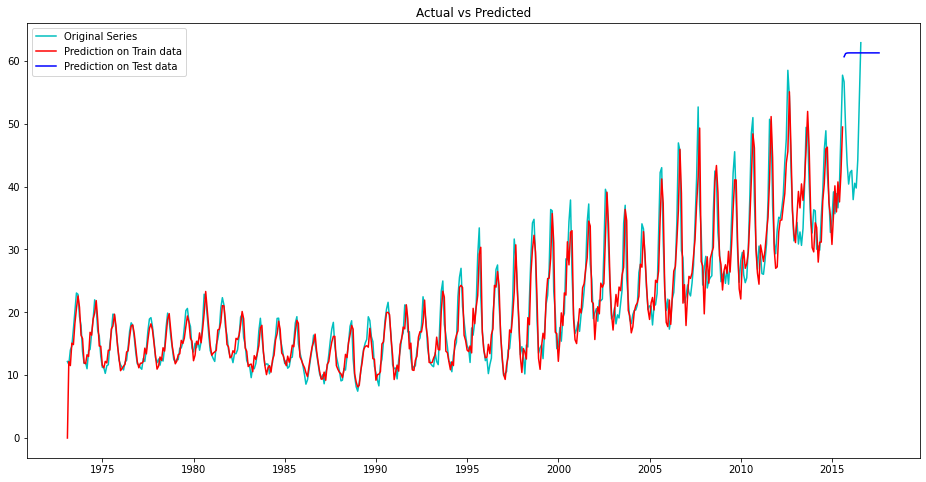

In [281]:
plt.figure(figsize=(16,8))
plt.plot(ts_mte, color = 'c', label = 'Original Series')
plt.plot(predictions_ARIMA, color = 'r', label = 'Prediction on Train data')
plt.plot(forecasted_ARIMA, label = 'Prediction on Test data', color='b')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

###**Check the RMSE on the original train and test data and write your conclusion from the above analysis.**

In [282]:
error_predictions_ARIMA =  mean_squared_error(predictions_ARIMA, ts_train, squared= False)
error_predictions_ARIMA

2.9984787795941177

In [283]:
error_forecasted_ARIMA = mean_squared_error(forecasted_ARIMA.iloc[:12,], ts_test, squared = False)
error_forecasted_ARIMA

16.826209718240715

####**Think about it:**
- Can we use other than RMSE measurement to check the performance of the model?
 - Yes. We can use the other than RMSE measurement to check for regression model such as measurements Mean Absolute Error (MAE), Relative Squared Error (RSE), Relative Absolute Error (RAE), and Coefficient of Determination (R2 or R-squared).

####**Think about it:**

 Can we use other forecasting methods such as SARIMA to improve our model performance?

- [A Gentle Introduction to SARIMA for Time Series Forecasting in Python](https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/)
- [Forecasting with Seasonal ARIMA in Python](https://www.datasciencecentral.com/profiles/blogs/tutorial-forecasting-with-seasonal-arima)

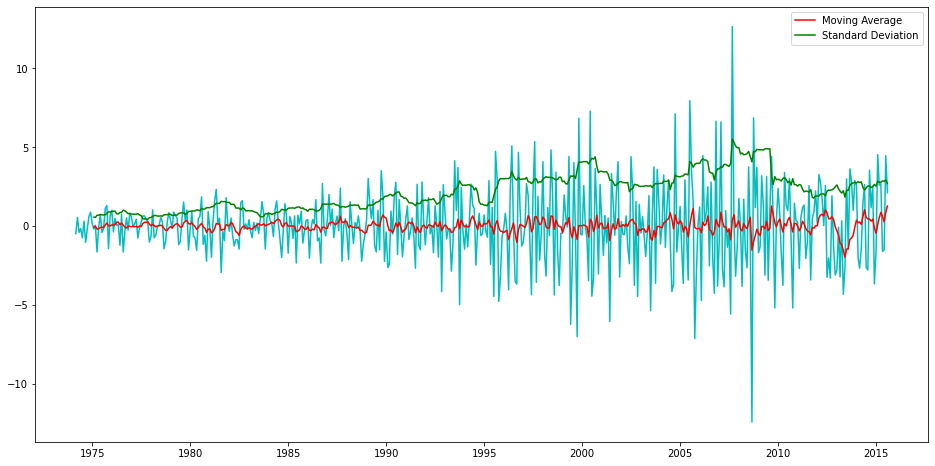

In [284]:
# Attempting SARIMA

#Differencing the series
plt.figure(figsize=(16,8))
df_seas = df_shift - df_shift.shift(periods = 12)
MAvg_seas = df_seas.rolling(window=12).mean()
MStd_seas = df_seas.rolling(window=12).std()
plt.plot(df_seas, color='c')
plt.plot(MAvg_seas, color='red', label = 'Moving Average')
plt.plot(MStd_seas, color='green', label = 'Standard Deviation')
plt.legend()
plt.show()

df_seas = df_seas.dropna()

<Figure size 1296x720 with 0 Axes>

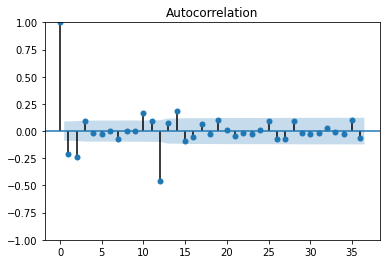

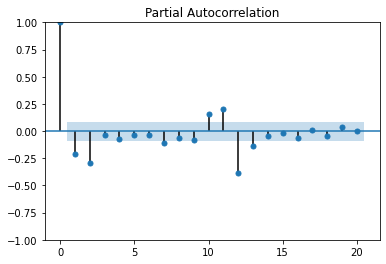

In [55]:
plt.figure(figsize = (18,10))
plot_acf(df_seas, lags = 36) 
plt.show() 
plot_pacf(df_seas, lags = 20) 
plt.show()


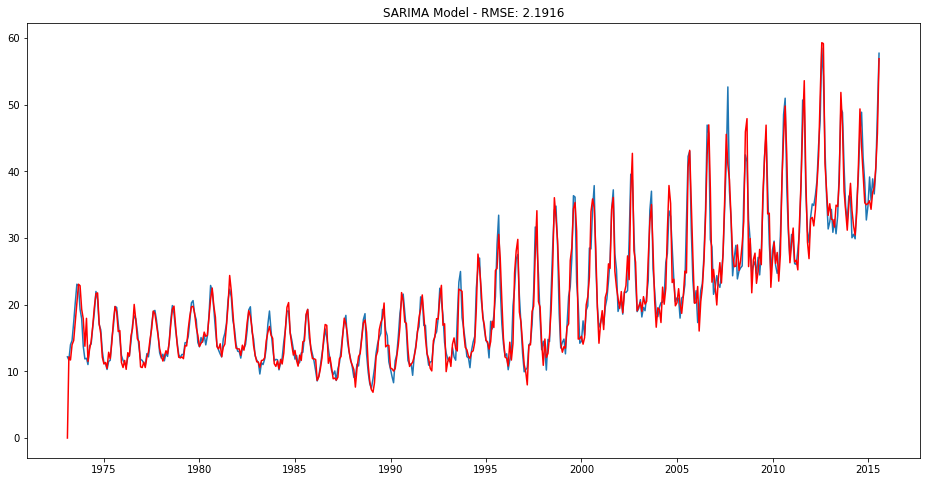

In [56]:
# p = 1
# q = 1
# SARIMA(1,1,1)(1,1,0)12
plt.figure(figsize=(16,8))
model_SARIMA = SARIMAX(ts_train, order=(0,1,0), seasonal_order=(1,1,0,12))
results_SARIMA = model_SARIMA.fit()
plt.plot(ts_train)
plt.plot(results_SARIMA.fittedvalues, color='red')
plt.title('SARIMA Model - RMSE: %.4f'% mean_squared_error(results_SARIMA.fittedvalues,ts_train['Value'], squared=False))
plt.show()


In [57]:
results_SARIMA.aic

2161.11635076344

In [58]:
spredictions=pd.Series(results_SARIMA.fittedvalues)
predictions_SARIMA = spredictions.copy()
predictions_SARIMA.head()

YYYYMM
1973-01-31     0.000
1973-02-28    12.175
1973-03-31    11.708
1973-04-30    13.994
1973-05-31    14.627
Freq: M, dtype: float64

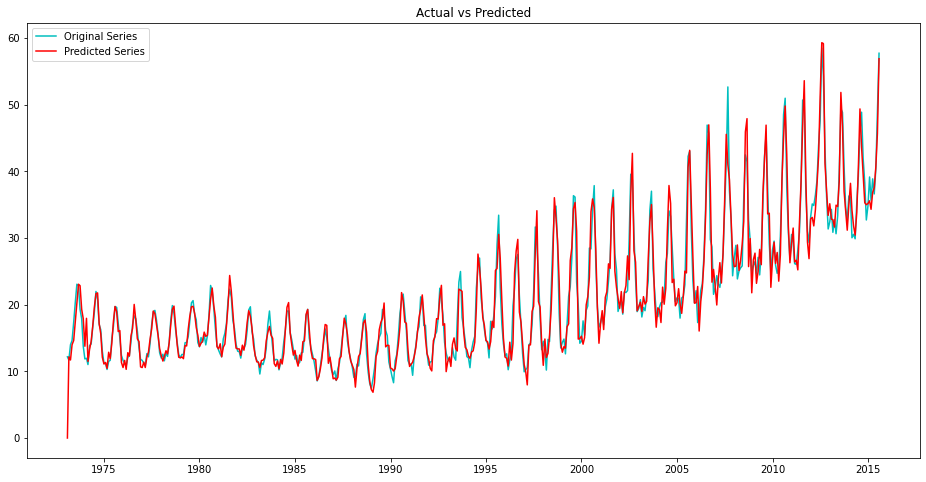

In [59]:
#Plotting the original vs predicted series
plt.figure(figsize=(16,8))
plt.plot(ts_train, color = 'c', label = 'Original Series')
plt.plot(predictions_SARIMA, color = 'r', label = 'Predicted Series')
plt.title('Actual vs Predicted')
# plt.ylim(0,200)
plt.legend()
plt.show()

In [60]:
#Forecasting the values for next 24 months
forecasted_SARIMA = results_SARIMA.forecast(steps=24) # here steps represent the number of months
# forecasted_SARIMA = np.exp(forecasted_SARIMA)
forecasted_SARIMA

2015-08-31    59.020327
2015-09-30    51.556592
2015-10-31    46.695822
2015-11-30    42.824195
2015-12-31    45.669979
2016-01-31    47.901001
2016-02-29    43.190252
2016-03-31    45.134869
2016-04-30    43.619778
2016-05-31    48.151206
2016-06-30    54.538642
2016-07-31    62.337108
2016-08-31    64.424542
2016-09-30    57.220437
2016-10-31    52.915638
2016-11-30    48.241601
2016-12-31    50.736303
2017-01-31    53.963193
2017-02-28    49.826222
2017-03-31    52.361325
2017-04-30    50.496032
2017-05-31    54.698582
2017-06-30    62.067157
2017-07-31    70.331461
Freq: M, Name: predicted_mean, dtype: float64

In [285]:
error_predictions_SARIMA = mean_squared_error(predictions_SARIMA, ts_train, squared = False)
error_predictions_SARIMA

2.1916390620382193

In [286]:
error_forecasted_SARIMA = mean_squared_error(forecasted_SARIMA.iloc[:12,], ts_test, squared = False)
error_forecasted_SARIMA

3.4880779837651734

## **Proposed Approach**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
 - Coal and petroleum coke are giving the most CO2 emissions.
- Yearly seasonality is big factors that influences nature gas CO2 Emissions. Emissions Value spikes in July and August (1st Tier Cohort) and then has a second-tier cohort of emissions in June and September, and a third-tier cohort of emissions for May and October, and a fourth-tier cohort of emissions for the other months in the year. 


####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
  - As observed, most of the predicted values on the training data are close to the actual values in the ARIMA and SARIMA models. It implies both of two models are performing well.
 - SARIMA is performing relatively better with least RMSE and less AIC value. 
 - There is a scope to improve the performance further by fine tunning the parameters in the model. Searching over model orders to find the optimal number of lags as example.

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?
 - The SARIMA model will be proposed to be adopted for **Natural gas based CO2 emission forecasting**

 - By using the ARIMA, we get RMSE=2.9985, and aic=2566.2613118432405 by checking the AIC value of the model.
 - By using the SARIMA, we get RMSE=2.1916, and aic=2161.11635076344 by checking the AIC value of the model.

 - By applying the ARIMA model, we get RMSE=2.9984787795941177 on the original train data, and RMSE=5.567068557258182 on testing data.
 - By applying the SARIMA model, we get RMSE=2.1916390620382193 on the original train data, and RMSE=3.4880779837651734 on testing data.

- In conclusion, the SARIMA model is showing the least RMSE and least AIC value. Also the SARIMA shows least RMSE values when applying on train data and test data.



####**Key recommendations for implementation**: 
- What are some key recommendations to implement the solutions? What should the implementation roadmap look like? What further analysis needs to be done or what other associated problems need to be solved?
 - Since the SARIMA model is performing better, we will adopt the SARIMA model to forecast the CO2 emissions value for natural gas (NNEIEUS) fuel type for the next 12 months


 - **The roadmap** for the energy company to execute on this program takes some time.  First they must look at the usage for the customers for a year period of usage and determine the mean value of customers and the most efficient low CO2 emission sources to product this rolling mean of monthly usage as a model.  The same process needs to be applied to the usage that will be used for the usage that will be above the typical mean usage using higher emitting energy sources.  A set of Customers will need to go through a trial or beta program to prove out the models of usage and the billing, to ensure that customers are not surprised by the potential of increased costs on peak months.  Also the company will need to communicate best practices for saving energy so that customers can choose to better controls costs.  


 - **Recommendations from the business perspective:**  
 - To balance the reduction of carbon emission and affordable electricity production we suggest using less CO2 emitting fuel sources such as wind, solar, etc. in Tier 1 and Tier 2 seasonality cohort months and use Coal and Petroleum Coke to augment the energy needs that are need to meet the energy demand that is needed that is above the rolling mean.  
 - Thus, the lesser CO2 emitting energy sources could be used as a steady state of energy source to meet the monthly mean, and the higher emitting mean CO2 energy sources should be used to less frequently to meet the increased demand, that is mostly driven by seasonality.
  - An Example: - Customer's average usage is 200 dollars per month for 12months, but in July the usage is 350 dollars and in January the usage is also 350 dollars per month. For the 0-200 usage of this customer the energy should use low CO2 emitting sources, and for any usage above $200 (which is usage above the typical mean), the energy source can be higher energy emitting CO2 such as Coal or Petroleum Coal, but this usage will be at a higher cost to the consumer since the usage is above the typical mean of this customer or the typical customer's usage across the year.  
 - This allows lower cost for consumer that stay below a typical mean of usage and also allows less CO2 emissions for these average usage customers. But also allows customers to use more as needed for peak months, but the costs are higher for usage above the typical mean usage, and this extra costs allow for allocations to be put in place for better CO2 emissions clean up programs.

**Other problems need to be solved** We need to understand the price for each energy source and connect to the CO2 emissions. We should also understand the consumer's monthly spend and monthly usage of the past.








#**Milestone 3**

**Executive Summary**
 - What are the key takeaways? What are the key next steps?
  - Profile the data to explore data. Decompose the seasonality of the data set. Make the data series a stationarity. Apply different models to find the mode with best practice.

**Problem and Solution Summary**
- What problem was being solved? What are the key points that describe the final proposed solution design? Why is this a 'valid' solution that is likely to solve the problem?
  - Profile the data to explore data and identify the primary factors of influence. Decompose the seasonality of the data set. Make the data a stationarity. Apply different models to find the mode with best practice.
 - Identified the primary factor is the seasonality that has influenced the nature gas emission the most, and the other sources that have contributed a lot to the total CO2 emissions.
  - SARIMA shows the least RMSE value and the least AIC value when applying on train data and test data and is proposed to be adopted for the next 12 months Nature Gas CO2 emissions forecasting.


**Recommendations for Implementation**
- What are the key actionables? 
- What is the expected benefit and/or costs? 
- What are the key risks and challenges? 
- What other problems need to be explored and in what priority order?

 - To balance the reduction of carbon emission and affordable electricity production we suggest using less CO2 emitting fuel sources such as wind, solar, etc. in Tier 1 and Tier 2 seasonality cohort months. 
 - The expected benefit is to use the energy source with less CO2 emitting in the peak of the year. The unknowns are the cost and availability of the different fuel sources as this is not in the current data set.
 - Price as for each energy source and connect to the CO2 emissions is needed to be explored as priority, and the consumer's monthly spend and monthly usage of the past, fuel source availability and profit margins are needed to be explored. We can also do analysis on the other primary sources such as the Coal and Petroleum to find the data patterns to understand the pattern how they affect total CO2 emissions.
  


## **Multivariate Approach: other primary factors analytics**
1.  Coal Electric Power
2.  Petroleum Coke


In [79]:
Emissions = ts.iloc[:,1:]
Emissions = Emissions.groupby(['Description', pd.Grouper(freq="M")])['Value'].sum().unstack(level = 0)
#Emissions.drop('Total Energy Electric Power Sector CO2 Emissions')
Emissions.head()

Description  Coal Electric Power Sector CO2 Emissions  ...  Total Energy Electric Power Sector CO2 Emissions
YYYYMM                                                 ...                                                  
1973-01-31                                     72.076  ...                                           111.621
1973-02-28                                     64.442  ...                                            99.185
1973-03-31                                     64.084  ...                                            99.112
1973-04-30                                     60.842  ...                                            93.183
1973-05-31                                     61.798  ...                                            98.012

[5 rows x 9 columns]

In [75]:
##ts_mte_all = Emissions[['Coal Electric Power Sector CO2 Emissions', 'Distillate Fuel', 'Natural Gas', 'Non-Biomass Waste Electric Power Sector CO2 Emissions', 'Petroleum Coke Electric Power Sector CO2 Emissions', 'Petroleum Electric Power Sector CO2 Emissions', 'Residual Fuel Oil Electric Power Sector CO2 Emissions', 'Total Energy Electric Power Sector CO2 Emissions']]
##ts_mte_all = Emissions.rename(columns={'Coal Electric Power Sector CO2 Emissions':'Coal', 'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions':'Distillate Fuel', 'Geothermal Energy Electric Power Sector CO2 Emissions':'Geothermal Energ', 'Natural Gas Electric Power Sector CO2 Emissions':'Natural Gas', 'Non-Biomass Waste Electric Power Sector CO2 Emissions':'Non-Biomass Waste', 'Petroleum Coke Electric Power Sector CO2 Emissions':'Petroleum Coke', 'Petroleum Electric Power Sector CO2 Emissions':'Petroleum', 'Residual Fuel Oil Electric Power Sector CO2 Emissions':'Residual Fuel Oil', 'Total Energy Electric Power Sector CO2 Emissions': 'Total Energy'}, inplace=True)
#ts_mte_sources = Emissions[['Coal Electric Power Sector CO2 Emissions', 'Petroleum Coke Electric Power Sector CO2 Emissions']]
#ts_mte_sources= Emissions[['Coal Electric Power Sector CO2 Emissions', 'Petroleum Coke Electric Power Sector CO2 Emissions']].rename(columns={'Coal Electric Power Sector CO2 Emissions':'Coal', 'Petroleum Coke Electric Power Sector CO2 Emissions':'Petroleum Coke'})
#ts_mte_sources.head()


Description    Coal  Petroleum Coke
YYYYMM                             
1973-01-31   72.076           0.128
1973-02-28   64.442           0.106
1973-03-31   64.084           0.083
1973-04-30   60.842           0.130
1973-05-31   61.798           0.167

In [72]:
#ts_train, ts_test = ts_mte_sources.iloc[:-12], ts_mte_sources.iloc[-12:]
#print(ts_train)
#print(ts_test)

In [73]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

###**1. Coal Electric Power**

In [186]:
ts_mte_coal = Emissions['Coal Electric Power Sector CO2 Emissions']
ts_mte_coal = Emissions[['Coal Electric Power Sector CO2 Emissions']].rename(columns = {'Coal Electric Power Sector CO2 Emissions':'Coal'})
ts_mte_coal.head()


Description    Coal
YYYYMM             
1973-01-31   72.076
1973-02-28   64.442
1973-03-31   64.084
1973-04-30   60.842
1973-05-31   61.798

In [187]:
ts_train_coal, ts_test_coal = ts_mte_coal.iloc[:-12], ts_mte_coal.iloc[-12:]
print(ts_train_coal)
print(ts_test_coal)

Description     Coal
YYYYMM              
1973-01-31    72.076
1973-02-28    64.442
1973-03-31    64.084
1973-04-30    60.842
1973-05-31    61.798
...              ...
2015-03-31   106.412
2015-04-30    88.646
2015-05-31   104.498
2015-06-30   126.280
2015-07-31   140.283

[511 rows x 1 columns]
Description     Coal
YYYYMM              
2015-08-31   135.156
2015-09-30   118.653
2015-10-31    98.469
2015-11-30    90.263
2015-12-31    91.658
2016-01-31   113.495
2016-02-29    92.416
2016-03-31    72.840
2016-04-30    71.410
2016-05-31    82.510
2016-06-30   115.772
2016-07-31   135.958


####Elimination of the trend and seasonality: Decomposition

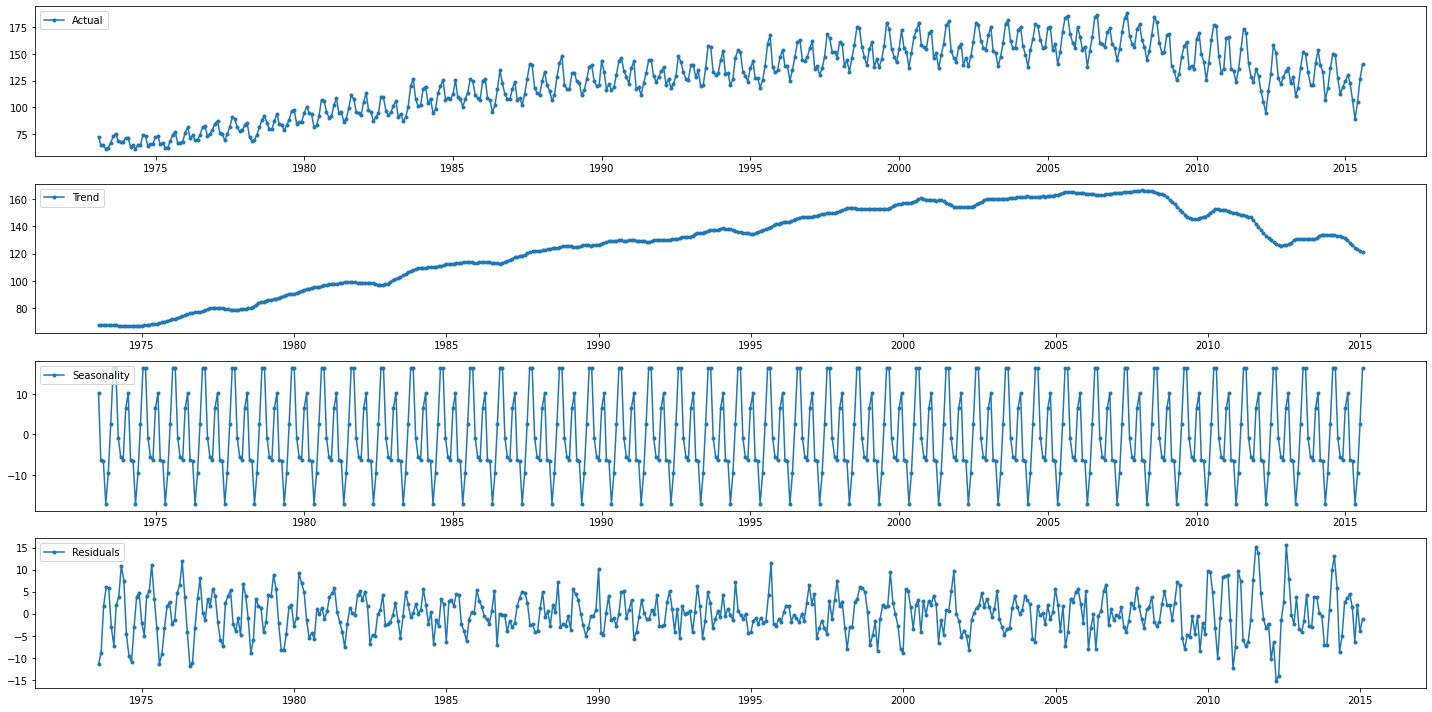

In [288]:

decomp = seasonal_decompose(ts_train_coal)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(ts_train_coal, label='Actual', marker='.')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', marker='.')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', marker='.')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', marker='.')
plt.legend(loc='upper left')
plt.tight_layout()

- From the above the plot visualization it displays significant trend, seasonality, and residuals components in the series.
- As you can see above, there is a clear yearly seasonality. Every year, you see a peak towards the March following by the lowest points in Jun and then a peak towards the October following by lowest points and the end of each year.
- One would guess that July spike is driven by very hot weather and air conditioning needed, and that October spike is driven by very cold weather and heating needs???


####**Test the Stationarity**

In [189]:
def adfuller(dataset):
  #Code here
  from statsmodels.tsa.stattools import adfuller
  print('Dickey-Fuller Test: ')
  adftest = adfuller(dataset['Coal'])
  adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
  for key,value in adftest[4].items():
    adfoutput
    adfoutput['Critical Value (%s)'%key] = value
  print(adfoutput)
adfuller(ts_train_coal)


Dickey-Fuller Test: 
Test Statistic           -2.080485
p-value                   0.252434
Lags Used                14.000000
No. of Observations     496.000000
Critical Value (1%)      -3.443603
Critical Value (5%)      -2.867385
Critical Value (10%)     -2.569883
dtype: float64


- Fail to reject the null hypothesis regarding to the P>0.05

####**In next step, Transformate the dataset into a stationary one**
- Differencing the series (lagged series)

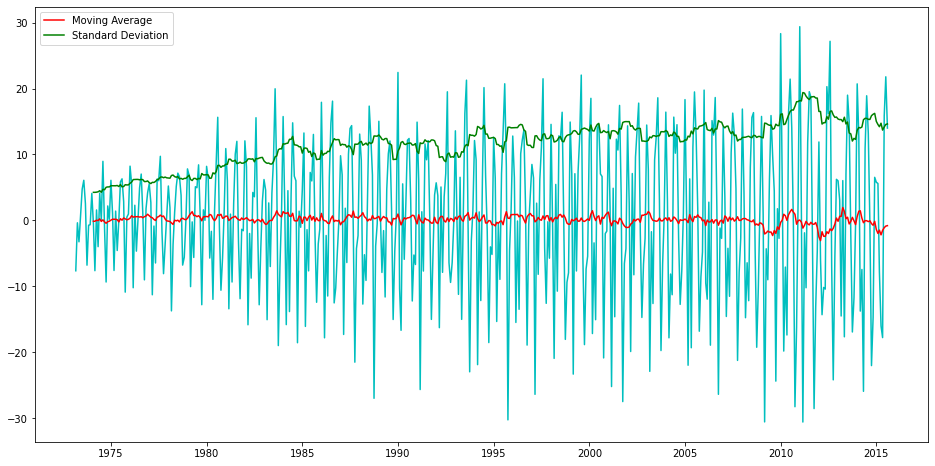

In [190]:
plt.figure(figsize=(16,8))
df_shift_coal = ts_train_coal - ts_train_coal.shift(periods=1)
MAvg_shift = df_shift_coal.rolling(window=12).mean()
MStd_shift = df_shift_coal.rolling(window=12).std()
plt.plot(df_shift_coal, color='c')
plt.plot(MAvg_shift, color='red', label = 'Moving Average')
plt.plot(MStd_shift, color='green', label = 'Standard Deviation')
plt.legend()
plt.show()

df_shift_coal= df_shift_coal.dropna()

In [104]:
adfuller(df_shift_coal)

Dickey-Fuller Test: 
Test Statistic           -5.636149
p-value                   0.000001
Lags Used                13.000000
No. of Observations     496.000000
Critical Value (1%)      -3.443603
Critical Value (5%)      -2.867385
Critical Value (10%)     -2.569883
dtype: float64


- The coal series of df_shift_coal is now stationary regarding to the P-value=0.



#####**Plot the ACF and PACF charts and find the optimal parameters p and q.**

<Figure size 1152x576 with 0 Axes>

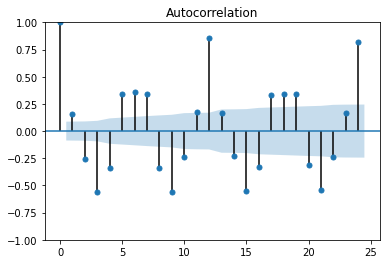

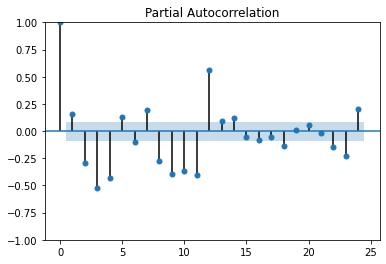

In [191]:
plt.figure(figsize = (16,8))
plot_acf(df_shift_coal, lags = 24) 
plt.show() 
plot_pacf(df_shift_coal, lags = 24) 
plt.show()

- Above the ACF and PACF plots, it identifies we should the use apply **p=1** and **q=1** to build the models.

##### **Appply the SARIMA Model**

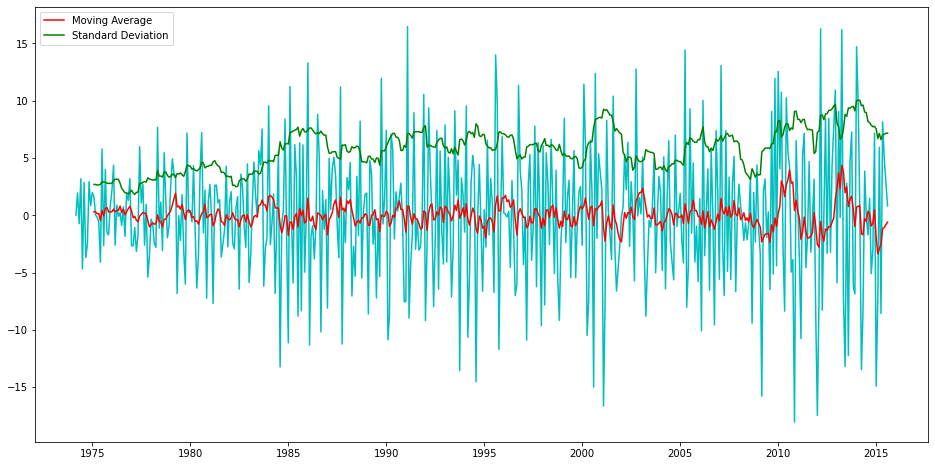

In [207]:
plt.figure(figsize=(16,8))
df_seas_coal = df_shift_coal - df_shift_coal.shift(periods =12)
MAvg_seas = df_seas_coal.rolling(window=12).mean()
MStd_seas = df_seas_coal.rolling(window=12).std()
plt.plot(df_seas_coal, color='c')
plt.plot(MAvg_seas, color='red', label = 'Moving Average')
plt.plot(MStd_seas, color='green', label = 'Standard Deviation')
plt.legend()
plt.show()

df_seas_coal = df_seas_coal.dropna()

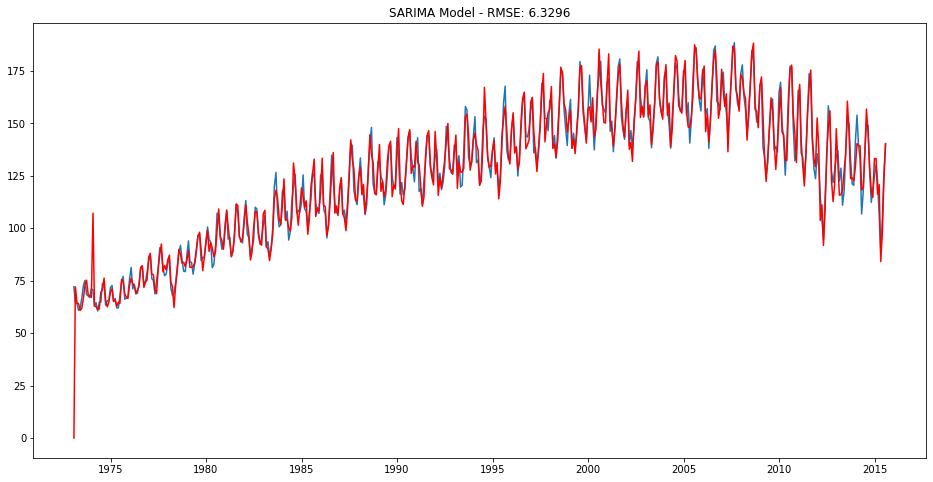

In [208]:
plt.figure(figsize=(16,8))
model_SARIMA = SARIMAX(ts_train_coal, order=(0,1,0), seasonal_order=(1,1,0,12))
results_SARIMA = model_SARIMA.fit()
plt.plot(ts_train_coal)
plt.plot(results_SARIMA.fittedvalues, color='red')
plt.title('SARIMA Model - RMSE: %.4f'% mean_squared_error(results_SARIMA.fittedvalues,ts_train_coal['Coal'], squared=False))
plt.show()

In [209]:
results_SARIMA.aic

3071.211532129716

##### **Appply the ARIMA Model**

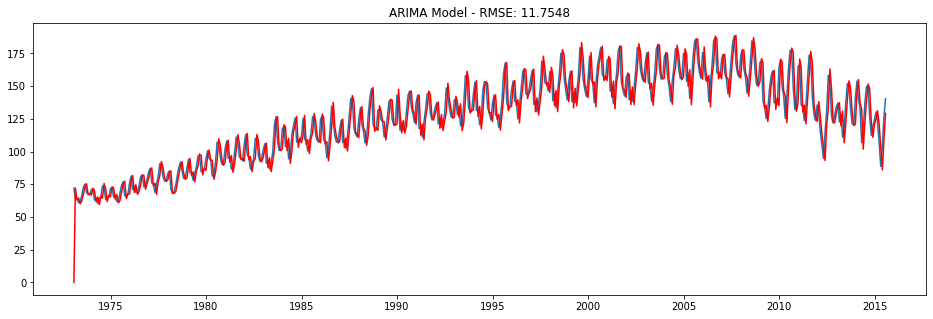

In [211]:
plt.figure(figsize=(16,5))
model_ARIMA = ARIMA(ts_train_coal, order=(1,1,1)) #Using p=1, d=1, q=1
results_ARIMA = model_ARIMA.fit()
plt.plot(ts_train_coal)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('ARIMA Model - RMSE: %.4f'% mean_squared_error(results_ARIMA.fittedvalues, ts_train_coal['Coal'], squared=False))
plt.show()

In [213]:
results_ARIMA.aic

3928.916406996736

##### **Appply the ARMA Model**

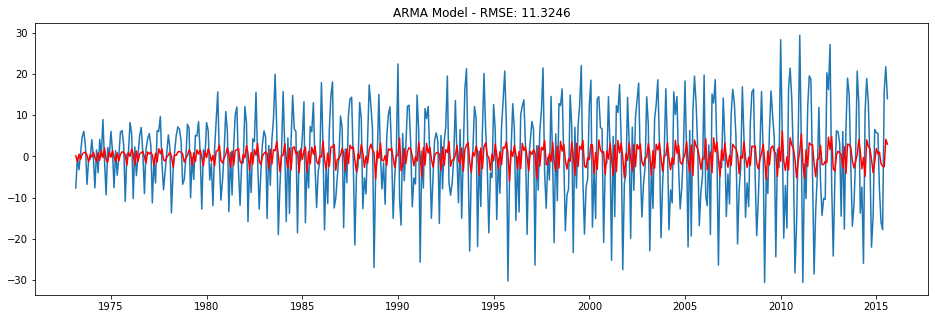

In [216]:
plt.figure(figsize=(16,5))
model_ARMA = ARIMA(df_shift_coal, order=(1, 0, 1)) #Using p=1, d=0, q=1
results_ARMA = model_ARMA.fit()
plt.plot(df_shift_coal)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('ARMA Model - RMSE: %.4f'% mean_squared_error(results_ARMA.fittedvalues, df_shift_coal['Coal'], squared=False))
plt.show()

In [217]:
results_ARMA.aic

3930.8640641701636

###**Conclusion:**
- SARIMA Model is performing better with least AIC value and least RMSE, thus SARIMA Model will be the proposal as adopted model for the **Coal Electric Power based CO2 emission forecasting**.

###**2. Petroleum Coke**

In [152]:

ts_mte_PetroleumCoke = Emissions['Petroleum Coke Electric Power Sector CO2 Emissions']
ts_mte_PetroleumCoke = Emissions[['Petroleum Coke Electric Power Sector CO2 Emissions']].rename(columns = {'Petroleum Coke Electric Power Sector CO2 Emissions': 'Petroleum Coke'})
ts_mte_PetroleumCoke.head()

Description  Petroleum Coke
YYYYMM                     
1973-01-31            0.128
1973-02-28            0.106
1973-03-31            0.083
1973-04-30            0.130
1973-05-31            0.167

In [168]:
ts_train_PetroleumCoke, ts_test_PetroleumCoke = ts_mte_PetroleumCoke.iloc[:-12], ts_mte_PetroleumCoke.iloc[-12:]
print(ts_train_PetroleumCoke)
print(ts_test_PetroleumCoke)

Description  Petroleum Coke
YYYYMM                     
1973-01-31            0.128
1973-02-28            0.106
1973-03-31            0.083
1973-04-30            0.130
1973-05-31            0.167
...                     ...
2015-03-31            0.772
2015-04-30            0.822
2015-05-31            0.964
2015-06-30            0.872
2015-07-31            1.174

[511 rows x 1 columns]
Description  Petroleum Coke
YYYYMM                     
2015-08-31            1.106
2015-09-30            1.062
2015-10-31            0.868
2015-11-30            0.727
2015-12-31            0.780
2016-01-31            0.960
2016-02-29            0.937
2016-03-31            1.041
2016-04-30            1.096
2016-05-31            1.035
2016-06-30            1.075
2016-07-31            1.137


####**Elimination of the trend and seasonality: Decomposition**

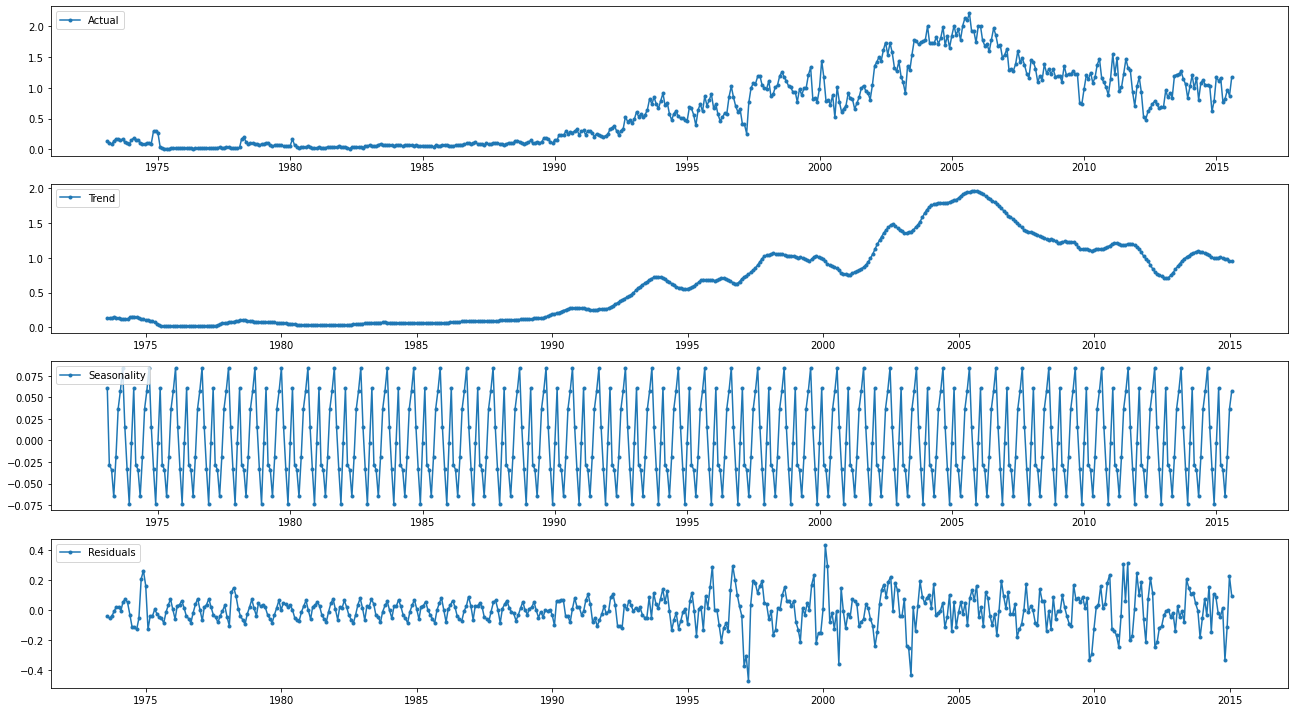

In [287]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts_train_PetroleumCoke)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.figure(figsize=(18,10))
plt.subplot(411)
plt.plot(ts_train_PetroleumCoke, label='Actual', marker='.')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', marker='.')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', marker='.')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', marker='.')
plt.legend(loc='upper left')
plt.tight_layout()

- From the above the plot visualization it displays significant trend, seasonality, and residuals components in the series.
- As you can see above, there is a clear yearly seasonality. Every year, you see a peak towards the March following by the lowest points in Jun and then a peak towards the October following by lowest points and the end of each year.
- One would guess that July spike is driven by very hot weather and air conditioning needed, and that October spike is driven by very cold weather and heating needs??.


####**Test the Stationarity**

In [175]:
def adfuller(dataset):
  #Code here
  from statsmodels.tsa.stattools import adfuller
  print('Dickey-Fuller Test: ')
  adftest = adfuller(dataset['Petroleum Coke'])
  adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
  for key,value in adftest[4].items():
    adfoutput
    adfoutput['Critical Value (%s)'%key] = value
  print(adfoutput)
adfuller(ts_train_PetroleumCoke)

Dickey-Fuller Test: 
Test Statistic           -1.077080
p-value                   0.724125
Lags Used                17.000000
No. of Observations     493.000000
Critical Value (1%)      -3.443684
Critical Value (5%)      -2.867420
Critical Value (10%)     -2.569902
dtype: float64


- Fail to reject the null hypothesis regarding to the P>0.05

####**In next step, transformate the dataset into a stationary one**
- Differencing the series (lagged series)

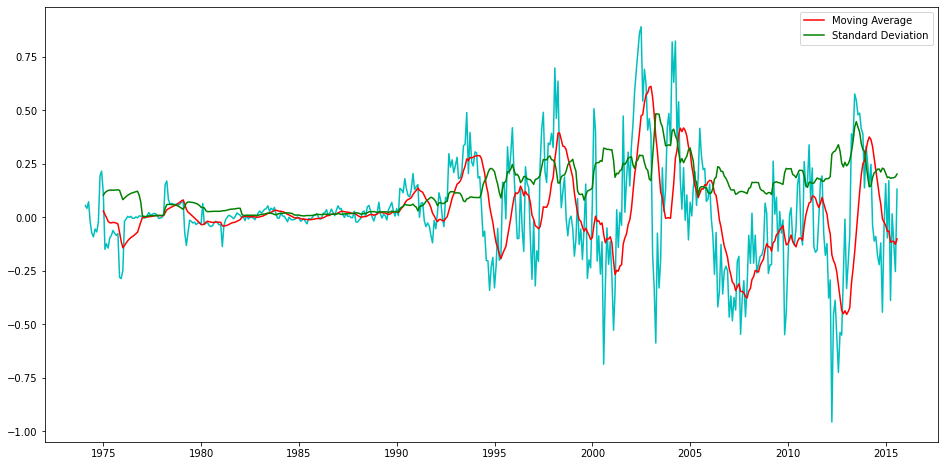

In [176]:
plt.figure(figsize=(16,8))
df_shift_PetroleumCoke = ts_train_PetroleumCoke - ts_train_PetroleumCoke.shift(periods=12)
MAvg_shift = df_shift_PetroleumCoke.rolling(window=12).mean()
MStd_shift = df_shift_PetroleumCoke.rolling(window=12).std()
plt.plot(df_shift_PetroleumCoke, color='c')
plt.plot(MAvg_shift, color='red', label = 'Moving Average')
plt.plot(MStd_shift, color='green', label = 'Standard Deviation')
plt.legend()
plt.show()

df_shift_PetroleumCoke.dropna(inplace=True)

In [177]:
adfuller(df_shift_PetroleumCoke)

Dickey-Fuller Test: 
Test Statistic           -5.008043
p-value                   0.000021
Lags Used                12.000000
No. of Observations     486.000000
Critical Value (1%)      -3.443877
Critical Value (5%)      -2.867505
Critical Value (10%)     -2.569947
dtype: float64


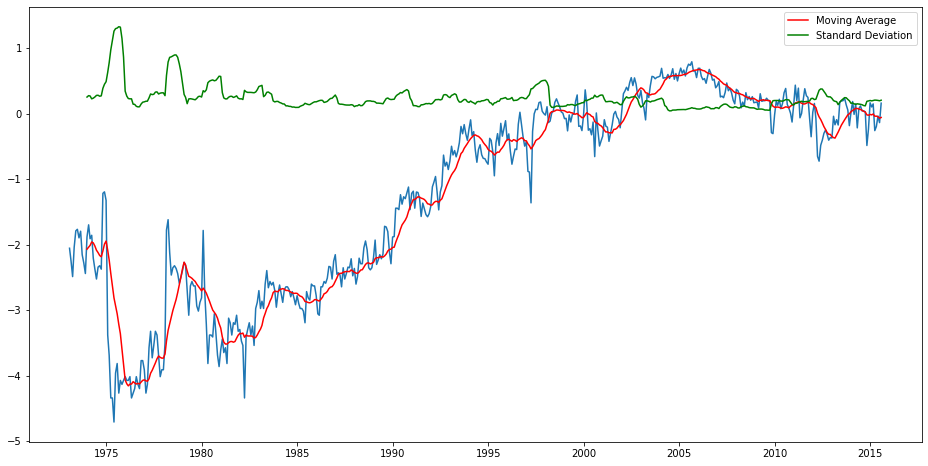

In [178]:
plt.figure(figsize=(16,8))
ts_log_PetroleumCoke = np.log(ts_train_PetroleumCoke)
MAvg = ts_log_PetroleumCoke.rolling(window=12).mean()
MStd = ts_log_PetroleumCoke.rolling(window=12).std()
plt.plot(ts_log_PetroleumCoke)
plt.plot(MAvg, color='r', label = 'Moving Average')
plt.plot(MStd, color='g', label = 'Standard Deviation')
plt.legend()
plt.show() 

In [179]:
adfuller(ts_log_PetroleumCoke)

Dickey-Fuller Test: 
Test Statistic           -1.093015
p-value                   0.717849
Lags Used                12.000000
No. of Observations     498.000000
Critical Value (1%)      -3.443549
Critical Value (5%)      -2.867361
Critical Value (10%)     -2.569870
dtype: float64


- Regarding to the stationarity test, it implies the dataset of df_shift_PetroleumCoke is stationary. We will use the df_shift_PetroleumCoke to get the **p** and **q** value.

#####**Plot the ACF and PACF charts and find the optimal parameters p and q.**

<Figure size 1152x576 with 0 Axes>

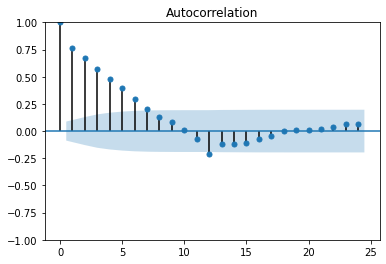

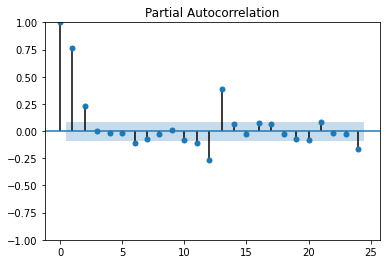

In [180]:
plt.figure(figsize = (16,8))
plot_acf(df_shift_PetroleumCoke, lags = 24) 
plt.show() 
plot_pacf(df_shift_PetroleumCoke, lags = 24) 
plt.show()

- Above the ACF and PACF plots, it identifies we should the use apply **p=1** and **q=1** to build the models.

##### **Appply the SARIMA Model**


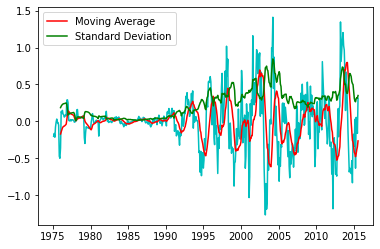

In [202]:
df_seas_PetroleumCoke = df_shift_PetroleumCoke - df_shift_PetroleumCoke.shift(periods =12)
MAvg_seas = df_seas_PetroleumCoke.rolling(window=12).mean()
MStd_seas = df_seas_PetroleumCoke.rolling(window=12).std()
plt.plot(df_seas_PetroleumCoke, color='c')
plt.plot(MAvg_seas, color='red', label = 'Moving Average')
plt.plot(MStd_seas, color='green', label = 'Standard Deviation')
plt.legend()
plt.show()

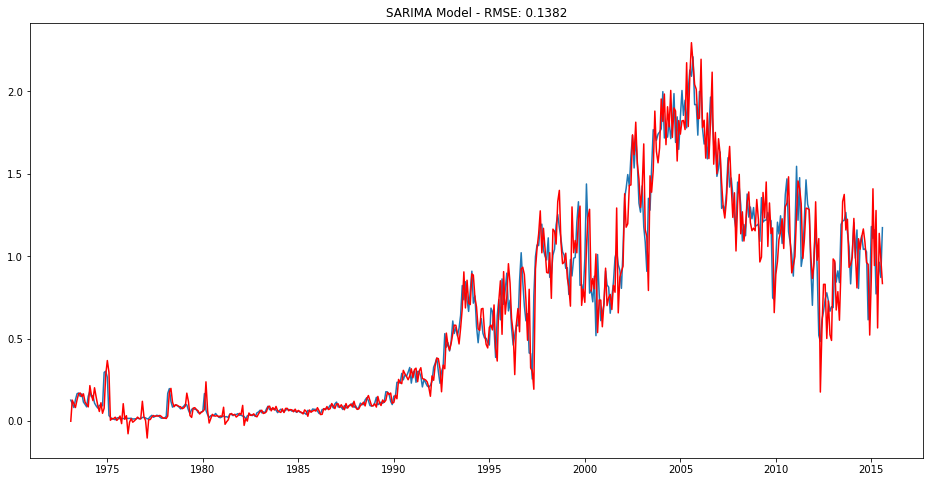

In [204]:
plt.figure(figsize=(16,8))
model_SARIMA = SARIMAX(ts_train_PetroleumCoke, order=(0,1,0), seasonal_order=(1,1,0,12))
results_SARIMA = model_SARIMA.fit()
plt.plot(ts_train_PetroleumCoke)
plt.plot(results_SARIMA.fittedvalues, color='red')
plt.title('SARIMA Model - RMSE: %.4f'% mean_squared_error(results_SARIMA.fittedvalues,ts_train_PetroleumCoke['Petroleum Coke'], squared=False))
plt.show()

In [205]:
results_SARIMA.aic

-540.9773334517976

##### **Appply the ARIMA Model**

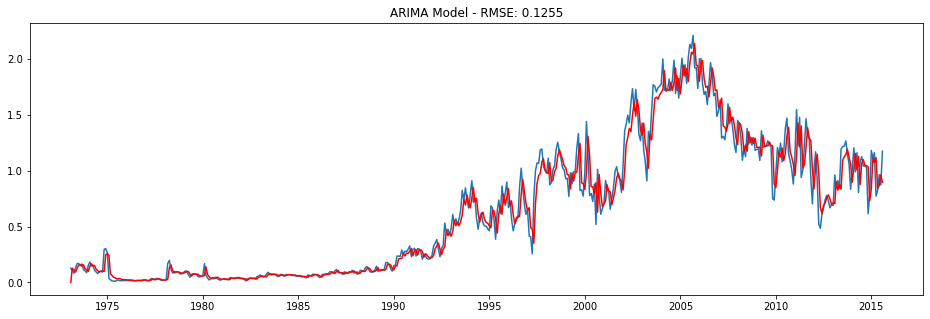

In [221]:
plt.figure(figsize=(16,5))
model_ARIMA = ARIMA(ts_train_PetroleumCoke, order=(1,1,1)) #Using p=1, d=1, q=1
results_ARIMA = model_ARIMA.fit()
plt.plot(ts_train_PetroleumCoke)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('ARIMA Model - RMSE: %.4f'% mean_squared_error(results_ARIMA.fittedvalues, ts_train_PetroleumCoke['Petroleum Coke'], squared=False))
plt.show()

In [222]:
results_ARIMA.aic

-663.1506616914173

##### **Appply the ARMA Model**

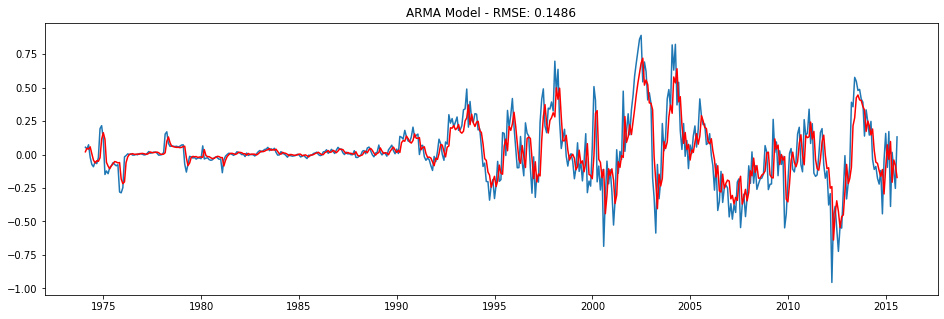

In [218]:
plt.figure(figsize=(16,5))
model_ARMA = ARIMA(df_shift_PetroleumCoke, order=(1, 0, 1)) #Using p=1, d=0, q=1
results_ARMA = model_ARMA.fit()
plt.plot(df_shift_PetroleumCoke)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('ARMA Model - RMSE: %.4f'% mean_squared_error(results_ARMA.fittedvalues, df_shift_PetroleumCoke['Petroleum Coke'], squared=False))
plt.show()

In [219]:
results_ARMA.aic

-477.44083745984557

###**Conclusion:**
- ARIMA Model is performing better with least AIC value and least RMSE, thus ARIMA Model will be the proposal as adopted model for the **Petroleum Coke based CO2 emission forecasting**.